### Playing with coffea, uproot

In [7]:
### Print not only the last line in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
import sys
coffea_path = '/afs/cern.ch/user/a/anpotreb/top/JERC/coffea/'
if coffea_path not in sys.path:
    sys.path.insert(0,coffea_path)

ak_path = '/afs/cern.ch/user/a/anpotreb/top/JERC/local-packages/'

if ak_path not in sys.path:
    sys.path.insert(0,ak_path)

import numpy as np
from coffea import processor, nanoevents

import hist

import matplotlib.pyplot as plt
from plotters.pltStyle import pltStyle
# from scipy.interpolate import CubicSpline
pltStyle(style='hep')

In [9]:
manual_bins = [400, 500, 600, 800, 1000, 1500, 2000, 3000, 7000, 10000]

# ptbins = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 20, 23, 27, 30, 35, 40, 45, 57, 72, 90, 120, 
        # 150, 200, 300, 400, 550, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 10000 ])
ptbins = np.array([15, 17, 20, 23, 27, 30, 35, 40, 45, 57, 72, 90, 120, 
        150, 200, 300, 400, 550, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 10000 ])

etabins = np.array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839, -3.664, -3.489,
                        -3.314, -3.139, -2.964, -2.853,  -2.65,   -2.5, -2.322, -2.172, -2.043,  -1.93, 
                        -1.83,  -1.74, -1.653, -1.566, -1.479, -1.392, -1.305, -1.218, -1.131, -1.044,
                        -0.957, -0.879, -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
                        -0.087,  0,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,  0.609,  0.696, 
                        0.783,  0.879,  0.957,  1.044,  1.131,  1.218,  1.305,  1.392,  1.479,  1.566, 
                        1.653,   1.74,   1.83,   1.93,  2.043,  2.172,  2.322,    2.5,   2.65,  2.853,
                        2.964,  3.139,  3.314,  3.489,  3.664,  3.839,  4.013,  4.191,  4.363,  4.538,
                        4.716,  4.889, 5.191])

In [10]:
# dataset_axis = hist.Cat("dataset", "Primary dataset")
# # cats_axis = hist.Cat("anacat", "Analysis Category")

# jetpt_axis = hist.Bin("pt", r"$p_T$", ptbins)
# ptresponse_axis = hist.Bin("ptresponse", "RECO / GEN response", 100, 0, 2.5)
# # jetmass_axis = hist.Bin("jetmass", r"Jet $m$ [GeV]", 50, 0, 500)
# jeteta_axis = hist.Bin("jeteta", r"Jet $\eta$", etabins)
# # jetphi_axis = hist.Bin("jetphi", r"Jet $\phi$", 50, -np.pi, np.pi)


# subsamples = ['b', 'c', 'u', 'd', 's', 'g', 'bbar', 'cbar', 'ubar', 'dbar', 'sbar']
# # self.subsamples = subsamples
# acc_dict = {'ptresponse_'+samp: hist.Hist("Counts", dataset_axis, jetpt_axis, jeteta_axis, ptresponse_axis) for samp in subsamples}
# acc_dict['ptresponse']  = hist.Hist("Counts", dataset_axis, jetpt_axis, jeteta_axis, ptresponse_axis)
# acc_dict['jetpt']       = hist.Hist("Counts", dataset_axis, jetpt_axis)
# acc_dict['jeteta']      = hist.Hist("Counts", dataset_axis, jeteta_axis)

# #         acc_dict['cutflow']     = processor.defaultdict_accumulator(dict)
# acc_dict['cutflow']    = processor.defaultdict_accumulator(int)

# # self._accumulator = processor.dict_accumulator(acc_dict)

In [11]:
# dataset_axis = hist2.axis.StrCategory("dataset", "Primary dataset")
subsamples = ['b', 'c', 'u', 'd', 's', 'g', 'bbar', 'cbar', 'ubar', 'dbar', 'sbar']
# dataset_axis = hist2.axis.StrCategory([], growth=True, name="dataset", label="Primary dataset")

flavour_axis = hist.axis.StrCategory(subsamples, growth=False, name="jet_flav", label=r"jet_flavour")

pt_gen_axis = hist.axis.Variable(ptbins, name="pt_gen", label=r"$p_{T,gen}$")
pt_reco_axis = hist.axis.Variable(ptbins, name="pt_reco", label=r"$p_{T,reco}$")
ptresponse_axis = hist.axis.Regular( 100, 0, 2.5, overflow=False, underflow=False, name="ptresponse", label="RECO / GEN response")
jeteta_axis = hist.axis.Variable(etabins, name="jeteta", label=r"Jet $\eta$")

acc_dict = {}
acc_dict['ptresponse'] = hist.Hist(flavour_axis, pt_gen_axis, pt_reco_axis, ptresponse_axis, jeteta_axis, storage="weight", name="Counts")



In [41]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

from coffea.jetmet_tools import JetCorrectionUncertainty #FactorizedJetCorrector
from coffea.jetmet_tools import JECStack, CorrectedJetsFactory

from coffea.lookup_tools import extractor

events = NanoEventsFactory.from_root(
#     'root://cmsxrootd.fnal.gov///store/mc/RunIISummer20UL18NanoAODv9/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8/NANOAODSIM/20UL18JMENano_106X_upgrade2018_realistic_v16_L1v1-v1/230000/9EEE27FD-7337-424F-9D7C-A5427A991D07.root',
#     'root://cmsxrootd.fnal.gov///store/mc/RunIISummer20UL18NanoAODv9/TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/87DEE912-70CF-A549-B10B-1A229B256E88.root', #fileslist[0],
#     'root://xrootd-cms.infn.it//store/mc/RunIISummer20UL18NanoAODv9/TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/20UL18JMENano_106X_upgrade2018_realistic_v16_L1v1-v1/40000/BCB3E2FC-D575-0341-A211-5C9A8D8798B9.root',
#     'root://cmsxrootd.fnal.gov///store/mc/RunIISummer20UL18NanoAODv9/DYJetsToLL_M-50_TuneCH3_13TeV-madgraphMLM-herwig7/NANOAODSIM/20UL18JMENano_HerwigJetPartonBugFix_106X_upgrade2018_realistic_v16_L1v1-v1/50000/A5653C07-C418-2442-B1F2-55688FC0CBED.root', #fileslist[0],
#     'root://xrootd-cms.infn.it//store/mc/RunIISummer20UL18NanoAODv9/QCD_HT100to200_TuneCH3_13TeV-madgraphMLM-herwig7/NANOAODSIM/20UL18JMENano_HerwigJetPartonBugFix_106X_upgrade2018_realistic_v16_L1v1-v1/2810000/83549D8B-6ACE-7949-A83F-280A6FAC261D.root',
#     'root://xrootd-cms.infn.it//store/mc/RunIISummer20UL18NanoAODv9/QCD_HT2000toInf_TuneCH3_13TeV-madgraphMLM-herwig7/NANOAODSIM/20UL18JMENano_HerwigJetPartonBugFix_106X_upgrade2018_realistic_v16_L1v1-v1/2810000/2C7AEDFF-AC07-DF44-9F84-CF0AF776108D.root',
#     'root://cmsxrootd.fnal.gov///store/mc/RunIISummer20UL18NanoAODv9/QCD_HT100to200_TuneCH3_13TeV-madgraphMLM-herwig7/NANOAODSIM/20UL18JMENano_HerwigJetPartonBugFix_106X_upgrade2018_realistic_v16_L1v1-v1/2810000/83549D8B-6ACE-7949-A83F-280A6FAC261D.root',
    'root://cmsxrootd.fnal.gov///store/mc/RunIISummer20UL18NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/20UL18JMENano_106X_upgrade2018_realistic_v16_L1v1-v1/30000/0230241E-754C-954D-B5D5-C104C1550830.root',
    schemaclass=NanoAODSchema.v6,
    entry_start=0,
    entry_stop=9975,
).events()
# events.keys()

Plugin version SecClnt v5.5.0 is incompatible with secztn v5.6.0 (must be <= 5.5.x) in sec.protocol libXrdSecztn-5.so
230719 14:59:23 32744 secgsi_GetCACheck: CRL entry for 'ba240aa8.0:1' needs refreshing: clean the related entry cache first (0x7f19c800e980)
Plugin version SecClnt v5.5.0 is incompatible with secztn v5.6.0 (must be <= 5.5.x) in sec.protocol libXrdSecztn-5.so


In [7]:
ext = extractor()
ext.add_weight_sets([
    "* * Summer20UL18_V2_MC/Summer20UL18_V2_MC_L1FastJet_AK4PFchs.txt",
    "* * Summer20UL18_V2_MC/Summer20UL18_V2_MC_L2Relative_AK4PFchs.txt",
    "* * Summer20UL18_V2_MC/Summer20UL18_V2_MC_L3Absolute_AK4PFchs.txt",
#             "* * Summer20UL18_V2_MC/Summer19UL18_V5_MC_L2L3Residual_AK4PFchs.txt", #Doesn't do anything but for transparancy I add it
])
ext.finalize()

jec_stack_names = ["Summer20UL18_V2_MC_L1FastJet_AK4PFchs",
                   "Summer20UL18_V2_MC_L2Relative_AK4PFchs", 
                   "Summer20UL18_V2_MC_L3Absolute_AK4PFchs",
#                            "Summer19UL18_V5_MC_L2L3Residual_AK4PFchs",
                  ]

evaluator = ext.make_evaluator()        
jec_inputs = {name: evaluator[name] for name in jec_stack_names}
jec_stack = JECStack(jec_inputs)

name_map = jec_stack.blank_name_map
name_map['JetPt'] = 'pt'
name_map['JetMass'] = 'mass'
name_map['JetEta'] = 'eta'
name_map['JetA'] = 'area'
name_map['ptGenJet'] = 'pt_gen'
name_map['ptRaw'] = 'pt_raw'
name_map['massRaw'] = 'mass_raw'
name_map['Rho'] = 'rho'


jet_factory = CorrectedJetsFactory(name_map, jec_stack)
flavor2partonNr = {'b':5,
                   'c':4,
                   's':3,
                   'u':2,
                   'd':1,
                   'bbar':-5,
                   'cbar':-4,
                   'sbar':-3,
                   'ubar':-2,
                   'dbar':-1,
                   'g':21,
                   'unmatched':0,
                   }

### Check cuts on the leptons, jets

In [50]:
dataset = 'DY'
jetflavour = 'partonFlavour'
npvCut = (events.PV.npvsGood > 0)
pvzCut = (np.abs(events.PV.z) < 24)
rxyCut = (np.sqrt(events.PV.x*events.PV.x + events.PV.y*events.PV.y) < 2)

selectedEvents = events[npvCut & pvzCut & rxyCut]
# output['cutflow'].fill(cutflow='selected_events', weight=len(selectedEvents))
# get GenJets and Jets
jets = selectedEvents.Jet

jet_gen_match_mask = ~ak.is_none(jets.matched_gen,axis=1)
jets = jets[jet_gen_match_mask]

jets = jets #[jets.pt>10]

In [1]:
import mplhep as hep

In [22]:
?curve_fit

In [133]:
def response_fnc(x, *p):
    p0, p1, p2, p3, p4, p5 = p
    logx = x
    return p0+(p1/((logx**2)+p2)) + (p3*np.exp(-p4*((logx-p5)*(logx-p5))))

def response_fnc2(x, *p):
    p0, p1, p2 = p
    return p0+(p1/((x**2)+p2)) # + (p3*np.exp(-p4*((logx-p5)*(logx-p5))))

def poly3(x, *p):
    p0, p1, p2, p3 = p
    return p0+p1*x+p2*x**2+p3*x**3 # + (p3*np.exp(-p4*((logx-p5)*(logx-p5))))

def sigmoid(x, *p):
    p0, p1, p2 = p
    return (1-p0)+p0/(1+np.exp(-p1*(x-p2)))

# def two_gaus_fnc(x, *p):
#     p0, p1, p2, p3, p4, p5, p6, p7, p8 = p
#     return (  p0
#             + (p1/((np.log10(x)**2)+p2))
#             + (p3*np.exp(-p4*((np.log10(x)-p5)*(np.log10(x)-p5))))
#             + (p6*np.exp(-p7*((np.log10(x)-p8)*(np.log10(x)-p8))))
#            )

def test_func(x):
    x = x.copy()
    x[x>10]=10
    x[x<3.5]=3.5
    return 0.926 - 0.0868*x + 0.0162*x**2-7.513e-04*x**3

In [82]:
# ([0]+([1]/((log10(x)^2)+[2])))+([3]*exp(-([4]*((log10(x)-[5])*(log10(x)-[5]))))

<IPython.core.display.Javascript object>


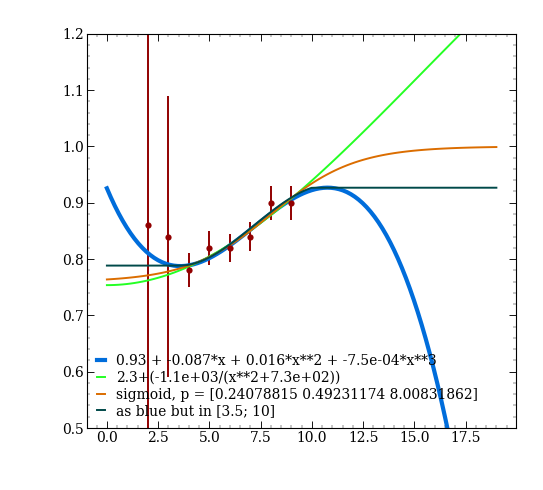

In [187]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
yvals = [0.86, 0.84, 0.78, 0.82, 0.82, 0.84, 0.9, 0.9]
yerr = [0.45, 0.25, 0.03, 0.03, 0.025, 0.025, 0.03, 0.03]
xvals = np.arange(2,10)
p, cov = curve_fit(poly3, xvals, yvals, sigma=yerr,  p0=[1,1,1,1])
p2, cov2 = curve_fit(response_fnc2, xvals, yvals, sigma=yerr,  p0=[1,10,10])
p3, cov3 = curve_fit(sigmoid, xvals, yvals, sigma=yerr,  p0=[0.5,0.5,6])
xvals_c = np.linspace(xvals[0]-2, xvals[-1]+10, 100)
yvals_c = poly3(xvals_c, *p)
yvals_c2 = response_fnc2(xvals_c, *p2)
yvals_c3 = sigmoid(xvals_c, *p3)
yvals_test = test_func(xvals_c)

fig, ax = plt.subplots()
ax.errorbar(xvals, yvals, yerr, linestyle="none")
ax.plot(xvals_c, yvals_c, markersize=0, linewidth=3, label='{:.2g} + {:.2g}*x + {:.2g}*x**2 + {:.1e}*x**3'.format(*p))
ax.plot(xvals_c, yvals_c2, markersize=0, label='{:.2g}+({:.2g}/(x**2+{:.2g}))'.format(*p2))
ax.plot(xvals_c, yvals_c3, markersize=0, label=f'sigmoid, p = {p3} ')
ax.plot(xvals_c, yvals_test, markersize=0, label='as blue but in [3.5; 10]')
ax.set_ylim(0.5,1.2)
ax.legend()
1;

In [183]:
%matplotlib notebook

<IPython.core.display.Javascript object>


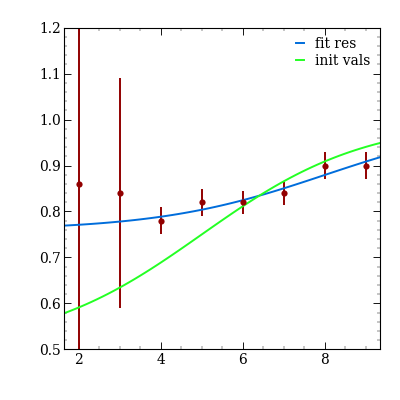

interactive(children=(FloatSlider(value=0.5, description='p0', max=2.0, min=-2.0, step=0.01), FloatSlider(valu…

In [180]:
# p, cov = curve_fit(poly3, xvals, yvals, sigma=yerr,  p0=[1,1,1,1])
# p2, cov2 = curve_fit(response_fnc2, xvals, yvals, sigma=yerr,  p0=[1,10,10])
# p3, cov3 = curve_fit(sigmoid, xvals, yvals, sigma=yerr,  p0=[1,10,10])
# xvals_c = np.linspace(xvals[0]-1, xvals[-1]+5, 100)
# yvals_c = poly3(xvals_c, *p)
# yvals_c2 = response_fnc2(xvals_c, *p2)

fig, ax = plt.subplots()
line = ax.errorbar(xvals, yvals, yerr, linestyle="none")
line_fit, = ax.plot([], [], markersize=0, label="fit res")
line_init, = ax.plot([], [], markersize=0, label="init vals")
ax.set_ylim(0.5, 1.2)
ax.legend()

def fit_sigmoid(p0=0.5,p1=0.5,p2=5):
    p_init = [p0,p1,p2]
    p3, cov3 = curve_fit(sigmoid, xvals, yvals, sigma=yerr,  p0=p_init)
    yvals_c3 = sigmoid(xvals_c, *p3)
    yvals_c_init = sigmoid(xvals_c, *p_init)
    
    line_fit.set_data(xvals_c, yvals_c3)
    line_init.set_data(xvals_c, yvals_c_init)
#     ax.relim()
#     ax.autoscale_view()
#     fig.canvas.draw()

#     fig, ax = plt.subplots()
#     ax.errorbar(xvals, yvals, yerr, linestyle="none")
    # ax.plot(xvals_c, yvals_c, markersize=0, linewidth=3, label='{:.2g} + {:.2g}*x + {:.2g}*x**2 + {:.1e}*x**3'.format(*p))
    # ax.plot(xvals_c, yvals_c2, markersize=0, label='{:.2g}+({:.2g}/(x**2+{:.2g}))'.format(*p2))
#     ax.plot(xvals_c, yvals_c3, markersize=0, label=f'fit res = {p3}')
#     ax.plot(xvals_c, yvals_c_init, markersize=0, label="init vals")
    # ax.plot(xvals_c, yvals_test, markersize=0, label='as blue but in [3.5; 10]')
#     ax.set_ylim(0.5,1.2)
#     ax.legend()
#     fig.show()

the_interaction = interactive(fit_sigmoid, p0=(-2,2,0.01), p1=(-0.01,2,0.01), p2=(-1,10,0.1) ) 
display(the_interaction)
1;

In [214]:
def poly3(x, *p):
    p0, p1, p2, p3 = p
    return p0+p1*x+p2*x**2+p3*x**3 # + (p3*np.exp(-p4*((logx-p5)*(logx-p5))))

def poly1(x, *p):
    p0, p1 = p
    return p0+p1*x

def poly2(x, *p):
    p0, p1, p2 = p
    return p0+p1*x+p2*x**2


def test_func(x):
    x = x.copy()
    x[x>10]=10
    x[x<3.5]=3.5
    return 0.926 - 0.0868*x + 0.0162*x**2-7.513e-04*x**3

def sigmoid_ylim(x, *p, ylim):
    p1, p2 = p
    p0 = (1-ylim)*(np.exp(-p1*p2)+1) 
    return (1-p0)+p0/(1+np.exp(-p1*(x-p2)))

def sigmoid_early_flat(x, *p, c):
    p0, p2 = p
    p1=c
    return (1-p0)+p0/(1+np.exp(-p1*(x-p2)))

In [212]:

p3

array([-172.28853354,    0.53778601,  -12.15559325])

<IPython.core.display.Javascript object>


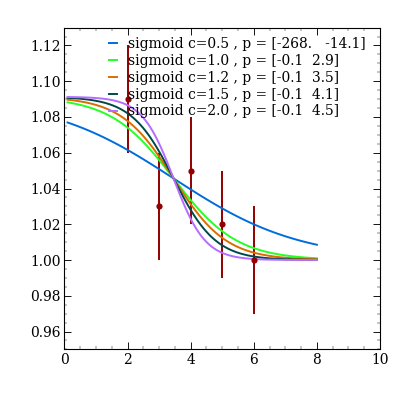

In [223]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
yvals = [1.09, 1.03, 1.05, 1.02, 1]
yerr = [0.03, 0.03, 0.03, 0.03, 0.03]
xvals = np.arange(2,7)
def sigmoid_0p1(x, *p):
    return sigmoid_ylim(x, *p, ylim=1.08)

def sigmoid_c_1p5(x, *p):
    return sigmoid_early_flat(x, *p, c=1.5)
def sigmoid_c_1p2(x, *p):
    return sigmoid_early_flat(x, *p, c=1.2)
def sigmoid_c_1p0(x, *p):
    return sigmoid_early_flat(x, *p, c=1.0)
def sigmoid_c_0p5(x, *p):
    return sigmoid_early_flat(x, *p, c=0.5)
def sigmoid_c_2p0(x, *p):
    return sigmoid_early_flat(x, *p, c=2.0)

p, cov = curve_fit(poly1, xvals, yvals, sigma=yerr,  p0=[1,1])
p2, cov2 = curve_fit(poly2, xvals, yvals, sigma=yerr,  p0=[1,10,10])
p3, cov3 = curve_fit(sigmoid, xvals, yvals, sigma=yerr,  p0=[0.5,0.5,6])
p4, cov4 = curve_fit(sigmoid_0p1, xvals, yvals, sigma=yerr,  p0=[0.5,6])
p5, cov5 = curve_fit(sigmoid_c_1p2, xvals, yvals, sigma=yerr,  p0=[0.1,2])
p6, cov6 = curve_fit(sigmoid_c_1p5, xvals, yvals, sigma=yerr,  p0=[0.1,2])
p7, cov7 = curve_fit(sigmoid_c_1p0, xvals, yvals, sigma=yerr,  p0=[0.1,2])
p8, cov8 = curve_fit(sigmoid_c_0p5, xvals, yvals, sigma=yerr,  p0=[0.1,2])
p9, cov9 = curve_fit(sigmoid_c_2p0, xvals, yvals, sigma=yerr,  p0=[0.1,2])

xvals_c = np.linspace(xvals[0]-1.9, xvals[-1]+2, 100)
yvals_c = poly1(xvals_c, *p)
yvals_c2 = poly2(xvals_c, *p2)
yvals_c3 = sigmoid(xvals_c, *p3)
yvals_c4 = sigmoid_0p1(xvals_c, *p4)
yvals_c5 = sigmoid_c_1p2(xvals_c, *p5)
yvals_c6 = sigmoid_c_1p5(xvals_c, *p5)
yvals_c7 = sigmoid_c_1p0(xvals_c, *p5)
yvals_c8 = sigmoid_c_0p5(xvals_c, *p5)
yvals_c9 = sigmoid_c_2p0(xvals_c, *p5)
# yvals_test = test_func(xvals_c)

fig, ax = plt.subplots()
ax.errorbar(xvals, yvals, yerr, linestyle="none")
# ax.plot(xvals_c, yvals_c, markersize=0,  label='{:.2g}+{:.2g}*x'.format(*p))
# ax.plot(xvals_c, yvals_c2, markersize=0, label='{:.2g}+{:.2g}*x+{:.1e}*x**2'.format(*p2))
# ax.plot(xvals_c, yvals_c3, markersize=0, label=f'sigmoid, p = {np.round(p3,1)} ')
# ax.plot(xvals_c, yvals_c4, markersize=0, label=f'sigmoid 1.08 at x=0 , p = {np.round(p4,1)} ')
ax.plot(xvals_c, yvals_c8, markersize=0, label=f'sigmoid c=0.5 , p = {np.round(p8,1)} ')
ax.plot(xvals_c, yvals_c7, markersize=0, label=f'sigmoid c=1.0 , p = {np.round(p7,1)} ')
ax.plot(xvals_c, yvals_c5, markersize=0, label=f'sigmoid c=1.2 , p = {np.round(p5,1)} ')
ax.plot(xvals_c, yvals_c6, markersize=0, label=f'sigmoid c=1.5 , p = {np.round(p6,1)} ')
ax.plot(xvals_c, yvals_c9, markersize=0, label=f'sigmoid c=2.0 , p = {np.round(p9,1)} ')
# ax.plot(xvals_c, yvals_test, markersize=0)
ax.set_ylim(0.95,1.13)
# ax.set_xscale('log')
ax.legend()
1;

<IPython.core.display.Javascript object>


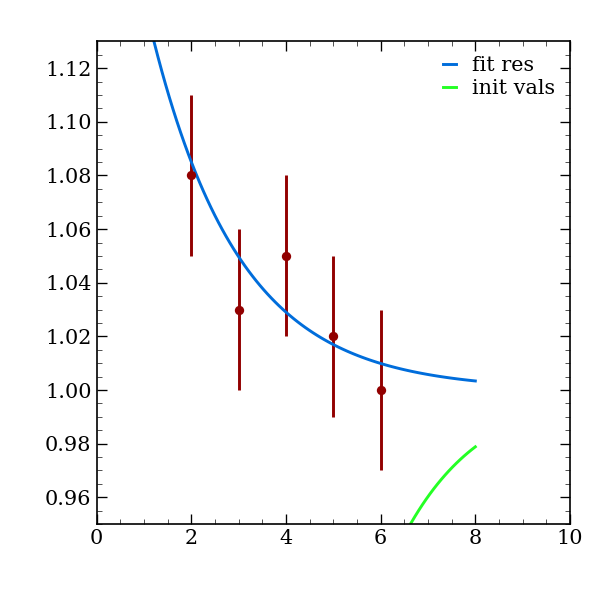

(0.95, 1.13)

interactive(children=(FloatSlider(value=-0.13, description='p0', max=2.0, min=-2.0, step=0.01), FloatSlider(va…

In [195]:
fig, ax = plt.subplots()
line = ax.errorbar(xvals, yvals, yerr, linestyle="none")
line_fit, = ax.plot([], [], markersize=0, label="fit res")
line_init, = ax.plot([], [], markersize=0, label="init vals")
ax.set_ylim(0.95,1.13)
ax.legend()
# ax.set_xscale('log')

def fit_sigmoid(p0=-0.13,p1=0.6,p2=2.2):
    p_init = [p0,p1,p2]
    p3, cov3 = curve_fit(sigmoid, xvals, yvals, sigma=yerr,  p0=p_init)
    yvals_c3 = sigmoid(xvals_c, *p3)
    yvals_c_init = sigmoid(xvals_c, *p_init)
    
    line_fit.set_data(xvals_c, yvals_c3)
    line_init.set_data(xvals_c, yvals_c_init)
    ax.set_xlim(0, 10)
#     ax.relim()
#     ax.autoscale_view()
#     fig.canvas.draw()

#     fig, ax = plt.subplots()
#     ax.errorbar(xvals, yvals, yerr, linestyle="none")
    # ax.plot(xvals_c, yvals_c, markersize=0, linewidth=3, label='{:.2g} + {:.2g}*x + {:.2g}*x**2 + {:.1e}*x**3'.format(*p))
    # ax.plot(xvals_c, yvals_c2, markersize=0, label='{:.2g}+({:.2g}/(x**2+{:.2g}))'.format(*p2))
#     ax.plot(xvals_c, yvals_c3, markersize=0, label=f'fit res = {p3}')
#     ax.plot(xvals_c, yvals_c_init, markersize=0, label="init vals")
    # ax.plot(xvals_c, yvals_test, markersize=0, label='as blue but in [3.5; 10]')
#     ax.set_ylim(0.5,1.2)
#     ax.legend()
#     fig.show()

the_interaction = interactive(fit_sigmoid, p0=(-2,2,0.01), p1=(-0.01,2,0.01), p2=(-1,10,0.1) ) 
display(the_interaction)

In [52]:
# h_n_matched_lep.axes[0].centers

In [53]:
genpart = selectedEvents.GenPart
lepton_mask = (
        ((np.abs(genpart.pdgId) == 11) |(np.abs(genpart.pdgId) == 13) | (np.abs(genpart.pdgId) == 15 ))
        & (genpart.statusFlags>>13&1 == 1) 
        & (genpart.statusFlags&1 == 1)
)
leptons = genpart[lepton_mask]

In [54]:
def check_efficiency(tightmuons, muorel='mu', samp='DY'):
    nlep_req = 2 if samp=='DY' else 1
    pdgid = 13 if muorel=='mu' else 11
    lab_txt = "muons" if muorel=='mu' else "electrons"
    print("The efficiency that all the tight "+lab_txt+" in the event are prompt "+lab_txt+" = {}".format(
        ak.sum(( ak.num(tightmuons) == (ak.sum(np.abs(leptons.pdgId)==pdgid,axis=1)) )&
               (ak.sum(np.abs(leptons.pdgId)==pdgid,axis=1) == nlep_req))
        /ak.sum(ak.sum(np.abs(leptons.pdgId)==pdgid, axis=1)==nlep_req)))
    print("The background contamination for "+lab_txt+" is = {}".format(
        ak.sum(
#             lab_txt,
            (ak.num(tightmuons)==nlep_req ) &
            ~ ( (ak.sum(np.abs(leptons.pdgId)==pdgid,axis=1)) ==nlep_req ) )
        /ak.sum(ak.num(np.abs(leptons.pdgId)==pdgid)==nlep_req)))

In [55]:
# set(muon.pfIsoId}

In [56]:
nlep_req = 2 if 'DY' in dataset else 1 if 'TTBAR' in dataset else 0

muon = events.Muon
tight_mu_cut = (muon.tightId) & (muon.pfIsoId>=4) & (np.abs(muon.eta)<2.3) & (muon.pt>20)
tightmuons = muon[tight_mu_cut]
check_efficiency(tightmuons, 'mu', samp=dataset)

electron = events.Electron
tight_ele_cut = (electron.cutBased==4) &(np.abs(electron.eta)<2.4) & (electron.pt>25)
tightelectrons = electron[tight_ele_cut]
check_efficiency(tightelectrons, 'el', samp=dataset)

events_with_good_lep = ((ak.num(tightmuons) == ak.num(leptons))
                        | (ak.num(tightelectrons) == ak.num(leptons) )
                       )

# events_with_good_lep = ((ak.num(tightmuons) == ak.sum(np.abs(leptons.pdgId)==13,axis=1) )|
#                         (ak.num(tightelectrons) == ak.sum(np.abs(leptons.pdgId)==11,axis=1) )
#                        )
    
def inv_mass_plus(lepton_pairs):
    return np.sqrt(np.abs(np.sum(lepton_pairs.E, axis=1)**2 - np.sum(lepton_pairs.px, axis=1)**2
                    - np.sum(lepton_pairs.py, axis=1)**2 - np.sum(lepton_pairs.pz, axis=1)**2))

mZpdg = 91.1876
# tightelectrons
# tightelectrons = tightelectrons[ak.num(tightelectrons)==2]
# len(tightelectrons)

DYcond = np.array([True]*len(events))

if 'DY' in dataset:
#     for tight_leptons in [tightelectrons, tightmuons]:
    DYcond = DYcond * (
        (np.sum(tightelectrons.pt, axis=1)>15) | (np.sum(tightmuons.pt, axis=1)>15)
#         ) & ( ak.num(tightmuons)==2)
    )
    DYcond = DYcond * (
        (np.abs(inv_mass_plus(tightelectrons) - mZpdg) < 20)
        | (np.abs(inv_mass_plus(tightmuons) - mZpdg) < 20)
    )
    
    
print(f"Number of events with tight muons {ak.sum( ak.num(tightmuons) == nlep_req)}")
print(f"Number of events with tight electrons {ak.sum( ak.num(tightelectrons) == nlep_req)}")
print(f"Number of events {len(events)}")

# np.sum((np.sum(tightelectrons.pt, axis=1)>15) & ( ak.num(tightelectrons)==2))
# np.sum((np.abs(inv_mass_plus(tightelectrons) - mZpdg) < 20) & ( ak.num(tightelectrons)==2))
print(f"DY condition is satisfied at {np.sum(DYcond)} events")
print(f"Number of events condition is satisfied at {np.sum(events_with_good_lep)} events")


print(f"Event efficiency = {ak.sum(DYcond*events_with_good_lep)}/{len(events)} = {ak.sum(DYcond*events_with_good_lep)/len(events)}"  )

The efficiency that all the tight muons in the event are prompt muons = 0.33099209833187004
The background contamination for muons is = 0.0002005012531328321
The efficiency that all the tight electrons in the event are prompt electrons = 0.17322354376334248
The background contamination for electrons is = 0.00010025062656641604
Number of events with tight muons 1133
Number of events with tight electrons 569
Number of events 9975
DY condition is satisfied at 1622 events
Number of events condition is satisfied at 1702 events
Event efficiency = 1622/9975 = 0.1626065162907268


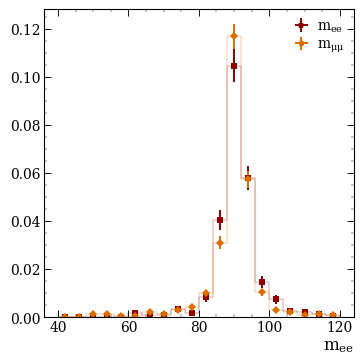

In [57]:
mZ_elel        = hist.new.Reg(20,40,120).Double()
mZ_mumu        = hist.new.Reg(20,40,120).Double()
mZ_elel.fill(inv_mass_plus(tightelectrons))
mZ_mumu.fill(inv_mass_plus(tightmuons))
fig, ax = plt.subplots()
mZ_elel.plot1d(ax=ax, label='$m_{ee}$', density=True) #, histtype='fill', flow=True)
mZ_mumu.plot1d(ax=ax, label='$m_{\mu\mu}$', density=True) #, histtype='fill', flow=True)
ax.legend()
ax.set_xlabel('$m_{ee}$')


selectedEvents = selectedEvents[events_with_good_lep*DYcond]
jets_no_lep_cut = ak.copy(jets)
jets = jets[events_with_good_lep*DYcond]
leptons = leptons[events_with_good_lep*DYcond]
1;

In [58]:
tightmuons = tightmuons[events_with_good_lep*DYcond]
tightelectrons = tightelectrons[events_with_good_lep*DYcond]

In [72]:
# jets.matched_electrons[0]

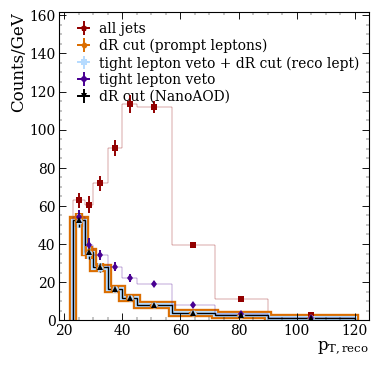

In [78]:
tight_jets = jets[(jets.jetId >> 2 & 1)==1]

drs = jets.metric_table(leptons, return_combinations=False, axis=1 )
matched_with_promt_lep = np.any((drs<0.4),axis=2)
overlappng_lep_mask = np.logical_not(matched_with_promt_lep)
ak.sum(overlappng_lep_mask)

drs = tight_jets.metric_table(leptons, return_combinations=False, axis=1 )
matched_with_promt_lep = np.any((drs<0.4),axis=2)
overlappng_lep_mask_tight = np.logical_not(matched_with_promt_lep)
ak.sum(overlappng_lep_mask_tight)

drs = tight_jets.metric_table(tightelectrons, return_combinations=False, axis=1 )
matched_with_promt_lep = np.any((drs<0.4),axis=2)
overlappng_reco_lep_mask = np.logical_not(matched_with_promt_lep)
ak.sum(overlappng_reco_lep_mask)

drs = tight_jets.metric_table(tightmuons, return_combinations=False, axis=1 )
matched_with_promt_lep = np.any((drs<0.4),axis=2)
overlappng_reco_lep_mask = overlappng_reco_lep_mask*np.logical_not(matched_with_promt_lep)
ak.sum(overlappng_reco_lep_mask)


ele_partFlav = jets.matched_electrons.genPartFlav
mu_partFlav = jets.matched_muons.genPartFlav
non_overlapping_with_gen_lep = (np.sum((ele_partFlav == 1),axis=2)==0) & (np.sum((mu_partFlav == 1),axis=2)==0)
ak.sum(non_overlapping_with_gen_lep)
# n_mathced_ele = np.sum(np.sum((mu_partFlav == 1),axis=2), axis=1) + np.sum(np.sum((ele_partFlav == 1),axis=2),axis=1)


# len(reco_jets)

fig, ax = plt.subplots()
pt_wd = ptbins[4:13]-ptbins[3:12]

jet_pt = hist.new.Var(ptbins[3:13]).Weight()
jet_pt.storage="weight"
jet_pt.fill(ak.flatten(jets.pt));
jet_pt = jet_pt/pt_wd
jet_pt.plot1d(label='all jets', ax=ax)

jet_pt = hist.new.Var(ptbins[3:13]).Weight()
jet_pt.storage="weight"
jet_pt.fill(ak.flatten(jets[overlappng_lep_mask].pt));
jet_pt = jet_pt/pt_wd
jet_pt.plot1d(label='dR cut (prompt leptons)', ax=ax, linewidth=6, alpha=1)

jet_pt = hist.new.Var(ptbins[3:13]).Weight()
jet_pt.fill(ak.flatten(tight_jets[overlappng_reco_lep_mask].pt));
jet_pt = jet_pt/pt_wd
jet_pt.plot1d(label='tight lepton veto + dR cut (reco lept)', ax=ax, linewidth=3, alpha=1)
# plt.legend()

jet_pt = hist.new.Var(ptbins[3:13]).Weight()
jet_pt.fill(ak.flatten(tight_jets.pt));
jet_pt = jet_pt/pt_wd
jet_pt.plot1d(label='tight lepton veto', ax=ax)

# jet_pt = hist.new.Var(ptbins[3:13]).Weight()
# jet_pt.fill(ak.flatten(tight_jets[overlappng_lep_mask_tight].pt));
# jet_pt = jet_pt/pt_wd
# jet_pt.plot1d(label='tight lepton veto + dR cut (prompt l)', ax=ax, linewidth=1, alpha=1)

jet_pt = hist.new.Var(ptbins[3:13]).Weight()
jet_pt.fill(ak.flatten(jets[non_overlapping_with_gen_lep].pt));
jet_pt = jet_pt/pt_wd
jet_pt.plot1d(label='dR cut (NanoAOD)', ax=ax, linewidth=1, alpha=1)
plt.legend()

ax.set_ylim(ax.get_ylim()[0],ax.get_ylim()[1]*1.3)
ax.set_xlabel("$p_{T,reco}$")
ax.set_ylabel("Counts/GeV")
1;

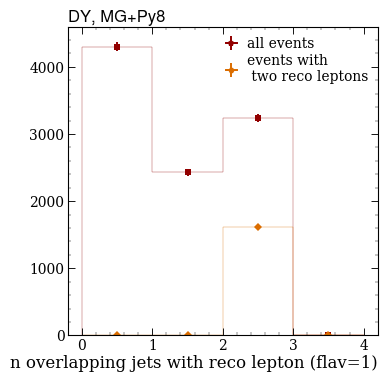

In [69]:
h_n_matched_lep_lep_cut = hist.new.Reg(4, 0, 4).Double()
h_n_matched_lep = hist.new.Reg(4, 0, 4).Double()

ele_partFlav = jets.matched_electrons.genPartFlav
np.sum(np.sum((ele_partFlav == 1),axis=2),axis=1) #)
mu_partFlav = jets.matched_muons.genPartFlav
n_mathced_ele = np.sum(np.sum((mu_partFlav == 1),axis=2), axis=1) + np.sum(np.sum((ele_partFlav == 1),axis=2),axis=1)
h_n_matched_lep_lep_cut.fill(n_mathced_ele);

ele_partFlav = jets_no_lep_cut.matched_electrons.genPartFlav
np.sum(np.sum((ele_partFlav == 1),axis=2),axis=1) #)
mu_partFlav = jets_no_lep_cut.matched_muons.genPartFlav
n_mathced_ele = np.sum(np.sum((mu_partFlav == 1),axis=2), axis=1) + np.sum(np.sum((ele_partFlav == 1),axis=2),axis=1)
h_n_matched_lep.fill(n_mathced_ele)

fig, ax = plt.subplots()
h_n_matched_lep.plot1d(ax=ax, label='all events') #, density=True)
h_n_matched_lep_lep_cut.plot1d(ax=ax, label='events with \n two reco leptons') #, density=True)
ax.legend()
hep.label.exp_text(text=f'DY, MG+Py8', loc=0, ax=ax)
ax.set_xlabel('n overlapping jets with reco lepton (flav=1)')
1;

In [409]:
# # tightmuons = events.Muon[(events.Muon.tightId) & (events.Muon.pfIsoId>=4)]

# print("The efficiency of tight muons being prompt muons = {}".format(
#     ak.sum( ak.num(tightmuons) == (ak.sum(np.abs(leptons.pdgId)==13,axis=1)))
#     /ak.sum((np.abs(leptons.pdgId)==13))))
# print("The background contamination for muons is = {}".format(
#     ak.sum(
#         (ak.num(tightmuons)==2 ) &
#         ~ ( (ak.sum(np.abs(leptons.pdgId)==13,axis=1)) ==2 ) )
#     /ak.sum((np.abs(leptons.pdgId)==13))))


# # tightelectrons = events.Electron[events.Electron.cutBased==4]
# print("The efficiency of tight electrons being prompt electrons = {}".format(
#     ak.sum( (ak.num(tightelectrons)==1) 
#            & ((ak.sum(np.abs(leptons.pdgId)==11,axis=1)) ==1 ) )
#     /ak.sum((np.abs(leptons.pdgId)==11))))
# print("The background contamination for electrons = {}".format(
#     ak.sum( (ak.num(tightelectrons)==1)
#            & ~ ( (ak.sum(np.abs(leptons.pdgId)==11,axis=1)) ==1 ) )
#     /ak.sum((np.abs(leptons.pdgId)==11))))


In [410]:
# ak.sum(ak.sum(events.Electron.cutBased==4,axis=1)==1)
# ak.sum(ak.sum(events.Muon.tightId, axis=1)==1 )
# ak.sum(ak.sum((events.Muon.tightId) & (events.Muon.pfIsoId>=4), axis=1)==1 )
# ak.sum(ak.sum((events.Muon.tightId) & (events.Muon.pfIsoId>=4), axis=1)==1 ) + ak.sum(ak.sum(events.Electron.cutBased==4,axis=1)==1)
# ak.sum((ak.sum(events.Electron.cutBased==4,axis=1) + ak.sum((events.Muon.tightId) & (events.Muon.pfIsoId>=4), axis=1))==1)
# ak.num(leptons)

In [411]:
# # jets
# # pt_wd = ptbins[4:13]-ptbins[3:12]

# ntightEl = hist.new.Var([0,1,2,3,4], overflow=True).Double()
# ntightMu = hist.new.Var([0,1,2,3,4], overflow=True).Double()
# ntightMu_pfIso4 = hist.new.Var([0,1,2,3,4], overflow=True).Double()
# # ntightMu = hist.new.Var([0,1,2,3,4], overflow=True).Double()
# tightMuIso        = hist.new.Reg(10,0,0.2).Double()
# tightMuIso_pfIso4 = hist.new.Reg(10,0,0.2).Double()
# tightElIso        = hist.new.Reg(10,0,0.2).Double()
# ntightEl = hist.new.Var([0,1,2,3,4], overflow=True).Double()

# tightMupfIsoId = hist.new.Var(list(set(ak.flatten(events.Muon.pfIsoId).to_numpy())) ).Double()

# # jet_pt.fill(ak.flatten(jets.pt));
# # jet_pt = jet_pt/pt_wd
# # jet_pt.plot1d(label='all jets', ax=ax)



# ntightMu.fill(ak.sum(events.Muon.tightId, axis=1))
# ntightEl.fill(ak.sum(events.Electron.cutBased==4,axis=1))
# ntightMu_pfIso4.fill(ak.sum(events.Muon[(events.Muon.pfIsoId>=4)].tightId, axis=1))

# tightMuIso_pfIso4.fill(ak.flatten(events.Muon[(events.Muon.tightId) & (events.Muon.pfIsoId>=4)].pfRelIso04_all))
# tightMuIso.fill(ak.flatten(events.Muon[(events.Muon.tightId)].pfRelIso04_all))
# tightElIso.fill(ak.flatten(events.Electron[(events.Electron.cutBased==4)].pfRelIso03_all))
# tightMupfIsoId.fill(ak.flatten(events.Muon.pfIsoId))

# fig, ax = plt.subplots()
# ntightEl.plot1d(ax=ax, label='Electron', density=True) #, histtype='fill', flow=True)
# ntightMu.plot1d(ax=ax, label='Muons', density=True)
# ntightMu_pfIso4.plot1d(ax=ax, label='Muons, pfIsoId>=4', density=True)
# ax.legend()
# ax.set_xlabel("n tight leptons")

# fig, ax = plt.subplots()
# tightElIso.plot1d(ax=ax, label='tight electrons, pfIso03', density=True)
# tightMuIso.plot1d(ax=ax, label='tight muons, pfIso04', density=True)
# tightMuIso_pfIso4.plot1d(ax=ax, label='tight muons, pfIsoId>=4, pfIso04', density=True)
# ax.set_xlabel("pfIso")
# ax.legend()
# 1;

# fig, ax = plt.subplots()
# tightMupfIsoId.plot1d(ax=ax, label='tight muons, pfIsoId', density=True)
# # tightElIso.plot1d(ax=ax, label='tight electrons, pfIso03', density=True)
# ax.set_xlabel("pfIsoId")
# ax.legend()
# 1;

In [13]:
dataset = 'QCD'
jetflavour = 'partonFlavour'
npvCut = (events.PV.npvsGood > 0)
pvzCut = (np.abs(events.PV.z) < 24)
rxyCut = (np.sqrt(events.PV.x*events.PV.x + events.PV.y*events.PV.y) < 2)

selectedEvents = events[npvCut & pvzCut & rxyCut]
# output['cutflow'].fill(cutflow='selected_events', weight=len(selectedEvents))
# get GenJets and Jets
jets = selectedEvents.Jet
print("num jets", ak.num(jets)[:30])
# output['cutflow'].fill(cutflow='all_jets', weight=ak.sum(ak.num(jets)))

########### Redo the flavour tagging if neccesarry. LHE Flavour2 derivation has to be done before the jet cuts  ###########
#### Some samples have a missing LHE flavour infomration ####
if 'LHEPart' in events.fields:
     if 'LHE_flavour' in jetflavour:
        raise ValueError(f"jet flavour is chosen as {jetflavour}, but the sample does not contain 'LHEPart' "+
                         ", so the jet flavour cannot be recalculated.")

if jetflavour=='LHE_flavour_2':
        jets = get_LHE_flavour_2(jets, selectedEvents)

############ Jet selection ###########
# Require that at least one gen jet is matched
jet_gen_match_mask = ~ak.is_none(jets.matched_gen,axis=1)
selected_jets = jets[jet_gen_match_mask]
# output['cutflow'].fill(cutflow='gen_matched', weight=ak.sum(ak.num(selected_jets)))

############ Apply Jet energy corrections on the jets ###########
# define variables needed for corrected jets
# https://coffeateam.github.io/coffea/notebooks/applying_corrections.html#Applying-energy-scale-transformations-to-Jets
## raw - subtracting back the corrections applying when generating the NanoAOD
selected_jets['pt_raw'] = (1 - selected_jets['rawFactor']) * selected_jets['pt']     #raw pt. pt before the corrects applied to data
selected_jets['mass_raw'] = (1 - selected_jets['rawFactor']) * selected_jets['mass']
selected_jets['pt_gen'] = ak.values_astype(ak.fill_none(selected_jets.matched_gen.pt, 0), np.float32)
selected_jets['rho'] = ak.broadcast_arrays(selectedEvents.fixedGridRhoFastjetAll, selected_jets.pt)[0]
events_cache = selectedEvents.caches[0]

reco_jets = jet_factory.build(selected_jets, lazy_cache=events_cache)
selectedEvents = selectedEvents #[:100]
reco_jets = reco_jets #[:100]

print("---"*10)
print("Before alpha cut")
print("recojetpt = ", reco_jets.pt)
print("genjetpt = ", reco_jets.matched_gen.pt)

######### Alpha cut = cut on the additional jet activity  ############
if "QCD" in dataset:
    # Correctly/safely treat the cases where there are less then 3 jets left after the cuts
    # select only the first three jets on QCD samples
    # to avoid effects due to a non-physical jet spectrum 
    reco_jetspt = ak.pad_none(reco_jets.pt, 3, axis=1, clip=True)
#     reco_jetspt = reco_jets.pt
    print("---"*10)
    print("Leading 3")
    print("num recopt = ", ak.num(reco_jetspt))
    print("recojetpt = ", reco_jetspt)
# print("genjetpt = ", reco_jets.matched_gen.pt[:10])

    alpha = reco_jetspt[:,2]*2/(reco_jetspt[:,0]+reco_jetspt[:,1])
    alpha = ak.fill_none(alpha,0)

    reco_jets = reco_jets[alpha<0.2][:,:3]
    selectedEvents = selectedEvents[alpha<0.2]
elif 'DY' in dataset:
    reco_jets = ak.pad_none(reco_jets, 2, axis=1, clip=True)
    # reco_jetspt = reco_jets.pt
    # print(reco_jetspt[:50])
    alpha = reco_jets.pt[:,1]/ak.sum(leptons.pt,axis=1)
    alpha = ak.fill_none(alpha,0)
    reco_jets = reco_jets[alpha<0.4]
    selectedEvents = selectedEvents[alpha<0.4]
# output['cutflow'].fill(cutflow='alpha<0.2; leading jets', weight=ak.sum(ak.num(reco_jets)))
# output['cutflow'].fill(cutflow='events, alpha<0.2',       weight=len(selectedEvents))

print("---"*10)
print("After alpha cut")
print("recojetpt = ", reco_jets.pt)
print("genjetpt = ", reco_jets.matched_gen.pt)


# Require no matched (dressed) leptons in the jet;
# Leptons are often misreconstructed as jets and can ruin the comparison between different samples.
genpart = selectedEvents.GenPart
lepton_mask = (
        ((np.abs(genpart.pdgId) == 11) | (np.abs(genpart.pdgId) == 13) | (np.abs(genpart.pdgId) == 15 ))
        & (genpart.statusFlags>>13&1 == 1) 
        & (genpart.statusFlags&1 == 1)
)
leptons = genpart[lepton_mask]
drs = reco_jets.metric_table(leptons, return_combinations=False, axis=1 )
matched_with_promt_lep = np.any((drs<0.4),axis=2)
jet_mask = np.logical_not(matched_with_promt_lep)
# reco_jets = reco_jets[np.logical_not(matched_with_promt_lep)]
ak.sum(ak.num(reco_jets))
len(reco_jets)

# jet_pt_mask = reco_jets.matched_gen.pt>15
# ## funny workaround to change the ak.type of jet_pt_mask from '10 * var * ?bool' to '10 * var * bool'
# ## otherwise after the correction .matched_gen field is not found.
# jet_pt_mask_shape = ak.num(jet_pt_mask)
# jet_pt_mask_np = ak.flatten(jet_pt_mask).to_numpy()
# jet_pt_mask = ak.unflatten(jet_pt_mask_np.data, jet_pt_mask_shape)
# reco_jets = reco_jets[jet_pt_mask]

num jets [7, 5, 4, 8, 11, 6, 9, 7, 7, 8, 8, 6, 7, ... 6, 12, 11, 6, 3, 7, 5, 10, 7, 9, 10, 5]
------------------------------
Before alpha cut
recojetpt =  [[140, 72.2, 66, 63.6, 59.1, 42.1, 27.6, ... 30, 28.4, 24.8, 22.2, 20.1, 19.5, 18.8]]
genjetpt =  [[130, 63, 58, 85.3, 58.1, 45.8, 23.8, ... 23.5, 39.3, 17.2, 16.8, 10.4, 15.7, 15.1]]
------------------------------
Leading 3
num recopt =  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ... 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
recojetpt =  [[140, 72.2, 66], [73.1, 63.3, 25.8], ... [80.4, 66.2, 51.7], [204, 68.9, 30]]
------------------------------
After alpha cut
recojetpt =  [[137, 133, 16.5], [281, 92.2, 30.3], ... 21.8], [81.3, 43.8], [181, 40.7, 21.6]]
genjetpt =  [[138, 129, 19.4], [258, 82.2, 27.9], [131, ... 30], [77.8, 54.6], [161, 60.6, 30.2]]


245

87

In [9]:
genpart = events.GenPart
lepton_mask = (
        ((np.abs(genpart.pdgId) == 11) | (np.abs(genpart.pdgId) == 13) | (np.abs(genpart.pdgId) == 15 ))
        & (genpart.statusFlags>>13&1 == 1) 
        & (genpart.statusFlags&1 == 1)
)
leptons = genpart[lepton_mask]

Hist(Regular(20, 0, 30, label='Axis 0'), storage=Double()) # Sum: 1000.0

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6a5dd69910>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

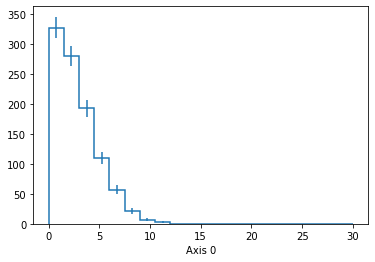

In [67]:
hi_Her = hist.new.Reg(20,0,30).Double()
hi_Her.fill(np.abs(events.PV.z))
hi_Her.plot1d()

In [41]:
hi = hist.new.Reg(50,0,200).Double()

In [49]:
hi_Her = hist.new.Reg(50,0,200).Double()
hi_Her.fill(events.LHE.Vpt)

Hist(Regular(50, 0, 200, label='Axis 0'), storage=Double()) # Sum: 995.0 (1000.0 with flow)

In [40]:
len(events.LHE.Vpt)

1000

In [1]:
events.Photon.pt[:,:1]

NameError: name 'events' is not defined

In [63]:
events.LHE.Vpt
events.Photon.pt[:,:1]

<Array [11.5, 5.47, 77.3, 31, ... 0, 0, 25, 0] type='1000 * float32[parameters={...'>

<Array [[36.7], [], [], ... [38.3], [], []] type='1000 * var * float32[parameter...'>

In [61]:
events.Photon.pt[:,:1]+events.LHE.Vpt

<Array [[48.1], [], [], ... [38.3], [], []] type='1000 * var * float32'>

In [57]:
print(events.Photon.pt[:,:1][:50])
print(events.LHE.Vpt[:50])



[[36.7], [], [], [41.2], [], [], [11.1], [], ... [], [], [], [], [], [], [], [], []]
[11.5, 5.47, 77.3, 31, 0, 16.4, 0, 0, 57.4, ... 0, 53.1, 29.1, 34.9, 0, 0, 56.9, 22]


0.0

256.4459

Hist(Regular(50, 0, 200, label='Axis 0'), storage=Double()) # Sum: 999.0 (1000.0 with flow)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6a5d27cac0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

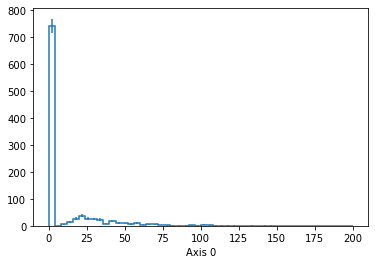

In [42]:
ak.min(events.LHE.Vpt)
ak.max(events.LHE.Vpt)
hi.fill(events.LHE.Vpt)


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6a5de425e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6a5de702e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

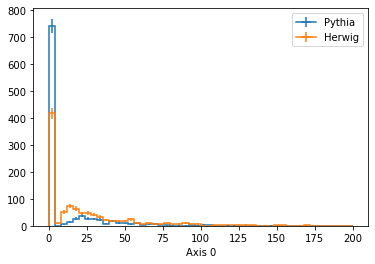

In [54]:
hi.plot1d(label = 'Pythia')
hi_Her.plot1d(label = 'Herwig')
plt.legend()

In [15]:
events.fields

['Electron',
 'CorrT1METJet',
 'PuppiMET',
 'fixedGridRhoFastjetCentral',
 'L1simulation',
 'LHEWeight',
 'RawPuppiMET',
 'run',
 'RawMET',
 'GenMET',
 'MET',
 'LHEScaleWeight',
 'GenIsolatedPhoton',
 'Pileup',
 'GenJet',
 'genTtbarId',
 'TkMET',
 'genWeight',
 'GenVisTau',
 'Generator',
 'LowPtElectron',
 'LHE',
 'HLTriggerFirstPath',
 'LHEReweightingWeight',
 'Tau',
 'GenPart',
 'L1',
 'OtherPV',
 'fixedGridRhoFastjetAll',
 'fixedGridRhoFastjetCentralCalo',
 'SoftActivityJetHT2',
 'SubGenJetAK8',
 'LHEPdfWeight',
 'SoftActivityJetHT',
 'PV',
 'Jet',
 'fixedGridRhoFastjetCentralNeutral',
 'SoftActivityJetNjets10',
 'DeepMETResponseTune',
 'SoftActivityJetNjets2',
 'Photon',
 'TrigObj',
 'ChsMET',
 'Flag',
 'SoftActivityJetNjets5',
 'GenDressedLepton',
 'GenVtx',
 'SoftActivityJet',
 'DeepMETResolutionTune',
 'CaloMET',
 'LHEPart',
 'luminosityBlock',
 'L1PreFiringWeight',
 'HLTriggerFinalPath',
 'SoftActivityJetHT5',
 'btagWeight',
 'event',
 'IsoTrack',
 'FsrPhoton',
 'boostedTau',
 

0

Hist(Regular(22, 1e-10, 22, name='flavor', label='jet flavor'), storage=Weight()) # Sum: WeightedSum(value=0, variance=0)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fc3f603ee20>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

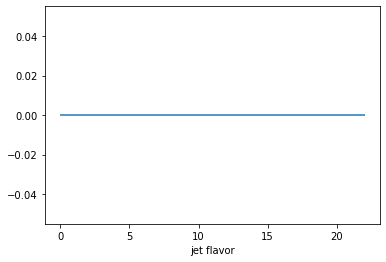

In [17]:
flavor_axis = hist.axis.Regular( 22, 0+1e-10, 22+1e-10, overflow=True, underflow=True, name="flavor", label="jet flavor")
hi = hist.Hist(flavor_axis, storage="weight", name="Counts")
genpart = events.GenPart
lepton_mask = (
    ((np.abs(genpart.pdgId) == 11) | (np.abs(genpart.pdgId) == 13) | (np.abs(genpart.pdgId) == 15 ))
    & (genpart.statusFlags>>13&1 == 1) 
    & (genpart.statusFlags&1 == 1)
)

genpart = genpart[lepton_mask]

np.sum(lepton_mask)
hi.fill(ak.flatten(np.abs(genpart.pdgId)).to_numpy())
# hi.values()[0]/hi.sum().value
hi.plot1d()

In [18]:
drs = jets.metric_table(genpart, return_combinations=False, axis=1 )
matched_with_promt_lep = np.any((drs<0.4),axis=2)
ak.sum(ak.num(jets))
ak.sum(ak.num(jets[np.logical_not(matched_with_promt_lep)]))

18964

18964

In [10]:
import hist
flavor_axis = hist.axis.Regular( 22, 0, 22, overflow=True, underflow=True, name="flavor", label="jet flavor")
hi = hist.Hist(flavor_axis, storage="weight", name="Counts")
jets = events.Jet
jet_gen_match_mask = ~ak.is_none(jets.matched_gen,axis=1)
jets = jets[jet_gen_match_mask]

# jets = jets[(jets.pt>30) & (jets.pt<60)]
hi.fill(ak.flatten(np.abs(jets.partonFlavour)).to_numpy())
hi.values()[0]/hi.sum().value

Hist(Regular(22, 0, 22, name='flavor', label='jet flavor'), storage=Weight()) # Sum: WeightedSum(value=18964, variance=18964)

0.02858046825564227

3000

Hist(Regular(24, 0, 23, name='ngenDressedLep'), storage=Double()) # Sum: 1522.0 (3000.0 with flow)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efb58f4ad90>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

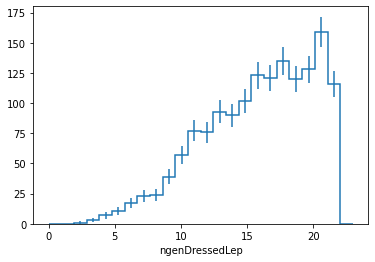

In [384]:
jets = events.Jet
h = (
    hist.Hist.new.Reg(24, 0, 23, overflow=True, underflow=True, name="ngenDressedLep").Double()
)
# np.sum(ak.num(events.GenDressedLepton)==2)
len(events)
h.fill(ak.num(jets.matched_electrons.genPartFlav))

h.plot1d()

In [427]:
h.sum()

1522.0

In [430]:
jets = events.Jet
len(ak.flatten(events.Jet))
flavor_axis = hist.axis.Regular( 22, 0, 22, overflow=True, underflow=True, name="flavor", label="jet flavor")
hi = hist.Hist(flavor_axis, storage="weight", name="Counts")
# At least one matched (dressed) electron/muon found;
# each jet has two slots for matched electrons available. Check that both are None. 
# jet_mask = jet_gen_match_mask & dressed_electron_mask & dressed_muon_mask

# len(ak.flatten(jets))

pt_mask = (jets.pt>30) & (jets.pt<60)
jets = jets[pt_mask] #jet_mask
print('pt mask')
len(ak.flatten(jets))
np.sum(jets.partonFlavour == 0)/len(ak.flatten(jets))

jetid_mask     = jets.jetId==6
# jets = jets[jetid_mask]
print('jet id')
len(ak.flatten(jets))
np.sum(jets.partonFlavour == 0)/len(ak.flatten(jets))

jet_gen_match_mask = ~ak.is_none(jets.matched_gen,axis=1)
jets = jets[jet_gen_match_mask]
print('gen jet exists')
len(ak.flatten(jets))
np.sum(jets.partonFlavour == 0)/len(ak.flatten(jets))

ele_partFlav = jets.matched_electrons.genPartFlav
dressed_electron_mask = np.logical_not(np.sum((ele_partFlav == 1) | (ele_partFlav == 15),axis=2))
jets = jets[dressed_electron_mask]
print('dressed el')
len(ak.flatten(jets))
np.sum(jets.partonFlavour == 0)/len(ak.flatten(jets))

mu_partFlav = jets.matched_muons.genPartFlav
dressed_muon_mask = np.logical_not(np.sum((mu_partFlav == 1) | (mu_partFlav == 15),axis=2))
jets = jets[dressed_muon_mask]
print('dressed mu')
len(ak.flatten(jets))
np.sum(jets.partonFlavour == 0)/len(ak.flatten(jets))

hi.fill(ak.flatten(np.abs(jets.partonFlavour)).to_numpy())
hi.values()[0]/hi.sum().value

24191

pt mask


6789

0.039181028133745764

jet id


6789

0.039181028133745764

gen jet exists


6601

0.03211634600818058

dressed el


6232

0.020057766367137356

dressed mu


5850

0.008376068376068376

Hist(Regular(22, 0, 22, name='flavor', label='jet flavor'), storage=Weight()) # Sum: WeightedSum(value=5850, variance=5850)

0.008376068376068376

In [190]:
print(jets.pt[5])
print(jets.matched_gen.pt[5])
print(jets.eta[5])
events.Electron[5]
events.Muon[5]

[19.2, 14.9, 4.93, 0.165, 0.000607, 0.000591]
[6.15, 14.6, 4.77, 3, 3.85, 5.65]
[-0.021, -1.67, -3.22, -4.06, 2.57, -2.59]


<ElectronArray [] type='0 * electron'>

<MuonArray [] type='0 * muon'>

In [183]:
jets.partonFlavour[5]
events.Electron[0]
events.Muon[0]

<Array [-4, 0, 0, 0, -1, 21] type='6 * int32[parameters={"__doc__": "flavour fro...'>

<ElectronArray [] type='0 * electron'>

<MuonArray [] type='0 * muon'>

In [171]:
events.Muon[1].jetIdx

<Array [1] type='1 * int32[parameters={"__doc__": "index of the associated jet (...'>

In [167]:
print(ak.is_none(jets.matched_muons,axis=2)[1])

[[True, True], [True, True], [True, True], [True, True], [True, True]]


In [166]:
print(dressed_muon_mask[1])

[True, False, True, True, True, True, True]


In [130]:
# jets.matched_electrons[0][0]

<ElectronArray [None, None] type='2 * ?electron'>

In [144]:
jets = events.Jet
jets.electronIdx1[3]
events.Electron[3]

<Array [0, -1, -1, -1, -1, ... -1, -1, -1, -1] type='10 * int32[parameters={"__d...'>

<ElectronArray [Electron] type='1 * electron'>

In [74]:
hi = hist.Hist(flavor_axis, storage="weight", name="Counts")
jets = events.Jet
jet_gen_match_mask = ~ak.is_none(jets.matched_gen,axis=1)
jets = jets[jet_gen_match_mask]

jets = jets[(jets.pt>50) & (jets.pt<200)]
hi.fill(ak.flatten(np.abs(jets.matched_gen.partonFlavour)).to_numpy())

Hist(Regular(22, 0, 22, name='flavor', label='jet flavor'), storage=Weight()) # Sum: WeightedSum(value=8417, variance=8417)

In [60]:

from coffea import processor, nanoevents
from coffea import util
import numpy as np
import pandas as pd
# from coffea.jetmet_tools import JetCorrectionUncertainty # FactorizedJetCorrector
from coffea.jetmet_tools import JECStack, CorrectedJetsFactory
from coffea.lookup_tools import extractor

from count_2d import count_2d
import hist
# from coffea import some_test_func
# some_test_func.test_func()

ext = extractor()
ext.add_weight_sets([
    "* * Summer20UL18_V2_MC/Summer20UL18_V2_MC_L1FastJet_AK4PFchs.txt",
    "* * Summer20UL18_V2_MC/Summer20UL18_V2_MC_L2Relative_AK4PFchs.txt",
    "* * Summer20UL18_V2_MC/Summer20UL18_V2_MC_L3Absolute_AK4PFchs.txt",
#             "* * Summer20UL18_V2_MC/Summer19UL18_V5_MC_L2L3Residual_AK4PFchs.txt", #Doesn't do anything but for transparancy I add it
])
ext.finalize()

jec_stack_names = ["Summer20UL18_V2_MC_L1FastJet_AK4PFchs",
                   "Summer20UL18_V2_MC_L2Relative_AK4PFchs", 
                   "Summer20UL18_V2_MC_L3Absolute_AK4PFchs",
#                            "Summer19UL18_V5_MC_L2L3Residual_AK4PFchs",
                  ]

evaluator = ext.make_evaluator()

print("evaluator = ", evaluator)
print("evaluator keys = ", evaluator.keys())

jec_inputs = {name: evaluator[name] for name in jec_stack_names}
jec_stack = JECStack(jec_inputs)


### more possibilities are available if you send in more pieces of the JEC stack
# mc2016_ak8_jxform = JECStack(["more", "names", "of", "JEC parts"])

#         self.corrector = FactorizedJetCorrector(
#             Summer20UL18_V2_MC_L1FastJet_AK4PFchs=evaluator['Summer20UL18_V2_MC_L1FastJet_AK4PFchs'],
#             Summer20UL18_V2_MC_L2Relative_AK4PFchs=evaluator['Summer20UL18_V2_MC_L2Relative_AK4PFchs'],
#             Summer20UL18_V2_MC_L3Absolute_AK4PFchs=evaluator['Summer20UL18_V2_MC_L3Absolute_AK4PFchs'],
#         )

name_map = jec_stack.blank_name_map
name_map['JetPt'] = 'pt'
name_map['JetMass'] = 'mass'
name_map['JetEta'] = 'eta'
name_map['JetA'] = 'area'
name_map['ptGenJet'] = 'pt_gen'
name_map['ptRaw'] = 'pt_raw'
name_map['massRaw'] = 'mass_raw'
name_map['Rho'] = 'rho'
jet_factory = CorrectedJetsFactory(name_map, jec_stack)

flavor2partonNr = {'b':5,
                   'c':4,
                   's':3,
                   'u':2,
                   'd':1,
                   'bbar':-5,
                   'cbar':-4,
                   'sbar':-3,
                   'ubar':-2,
                   'dbar':-1,
                   'g':21,
                   'unmatched':0,
                   }

flavors = flavor2partonNr.keys()

evaluator =  <coffea.lookup_tools.evaluator.evaluator object at 0x7efbb2e54d00>
evaluator keys =  dict_keys(['Summer20UL18_V2_MC_L1FastJet_AK4PFchs', 'Summer20UL18_V2_MC_L2Relative_AK4PFchs', 'Summer20UL18_V2_MC_L3Absolute_AK4PFchs'])


Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Regular(100, 0, 2.5, name='ptresponse', label='RECO / GEN response'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2.5  ,  2.65 ,  2.853,  2.964,  3.139,
        3.314,  3.489,  3.664,  3.839,  4.013,  4.191,  4.363,  4.538,
        4.716,  4.889,  5.191]), name='jeteta', label='Jet $\\eta$'),
  storage=Weight()) # Sum: WeightedSum(value=945.717, variance=50068.1)

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Regular(100, 0, 2.5, name='ptresponse', label='RECO / GEN response'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2.5  ,  2.65 ,  2.853,  2.964,  3.139,
        3.314,  3.489,  3.664,  3.839,  4.013,  4.191,  4.363,  4.538,
        4.716,  4.889,  5.191]), name='jeteta', label='Jet $\\eta$'),
  storage=Weight()) # Sum: WeightedSum(value=2908.66, variance=181689)

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Regular(100, 0, 2.5, name='ptresponse', label='RECO / GEN response'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2.5  ,  2.65 ,  2.853,  2.964,  3.139,
        3.314,  3.489,  3.664,  3.839,  4.013,  4.191,  4.363,  4.538,
        4.716,  4.889,  5.191]), name='jeteta', label='Jet $\\eta$'),
  storage=Weight()) # Sum: WeightedSum(value=3111.41, variance=174717)

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Regular(100, 0, 2.5, name='ptresponse', label='RECO / GEN response'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2.5  ,  2.65 ,  2.853,  2.964,  3.139,
        3.314,  3.489,  3.664,  3.839,  4.013,  4.191,  4.363,  4.538,
        4.716,  4.889,  5.191]), name='jeteta', label='Jet $\\eta$'),
  storage=Weight()) # Sum: WeightedSum(value=15136.7, variance=997617) (WeightedSum(value=15140.3, variance=997630) with flow)

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Regular(100, 0, 2.5, name='ptresponse', label='RECO / GEN response'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2.5  ,  2.65 ,  2.853,  2.964,  3.139,
        3.314,  3.489,  3.664,  3.839,  4.013,  4.191,  4.363,  4.538,
        4.716,  4.889,  5.191]), name='jeteta', label='Jet $\\eta$'),
  storage=Weight()) # Sum: WeightedSum(value=11876, variance=947088)

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Regular(100, 0, 2.5, name='ptresponse', label='RECO / GEN response'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2.5  ,  2.65 ,  2.853,  2.964,  3.139,
        3.314,  3.489,  3.664,  3.839,  4.013,  4.191,  4.363,  4.538,
        4.716,  4.889,  5.191]), name='jeteta', label='Jet $\\eta$'),
  storage=Weight()) # Sum: WeightedSum(value=1183.13, variance=60900.1)

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Regular(100, 0, 2.5, name='ptresponse', label='RECO / GEN response'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2.5  ,  2.65 ,  2.853,  2.964,  3.139,
        3.314,  3.489,  3.664,  3.839,  4.013,  4.191,  4.363,  4.538,
        4.716,  4.889,  5.191]), name='jeteta', label='Jet $\\eta$'),
  storage=Weight()) # Sum: WeightedSum(value=2694.92, variance=171577)

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Regular(100, 0, 2.5, name='ptresponse', label='RECO / GEN response'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2.5  ,  2.65 ,  2.853,  2.964,  3.139,
        3.314,  3.489,  3.664,  3.839,  4.013,  4.191,  4.363,  4.538,
        4.716,  4.889,  5.191]), name='jeteta', label='Jet $\\eta$'),
  storage=Weight()) # Sum: WeightedSum(value=3604.01, variance=197953)

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Regular(100, 0, 2.5, name='ptresponse', label='RECO / GEN response'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2.5  ,  2.65 ,  2.853,  2.964,  3.139,
        3.314,  3.489,  3.664,  3.839,  4.013,  4.191,  4.363,  4.538,
        4.716,  4.889,  5.191]), name='jeteta', label='Jet $\\eta$'),
  storage=Weight()) # Sum: WeightedSum(value=4902.54, variance=222044)

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Regular(100, 0, 2.5, name='ptresponse', label='RECO / GEN response'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2.5  ,  2.65 ,  2.853,  2.964,  3.139,
        3.314,  3.489,  3.664,  3.839,  4.013,  4.191,  4.363,  4.538,
        4.716,  4.889,  5.191]), name='jeteta', label='Jet $\\eta$'),
  storage=Weight()) # Sum: WeightedSum(value=6349.74, variance=397405) (WeightedSum(value=6358.79, variance=397487) with flow)

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Regular(100, 0, 2.5, name='ptresponse', label='RECO / GEN response'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2.5  ,  2.65 ,  2.853,  2.964,  3.139,
        3.314,  3.489,  3.664,  3.839,  4.013,  4.191,  4.363,  4.538,
        4.716,  4.889,  5.191]), name='jeteta', label='Jet $\\eta$'),
  storage=Weight()) # Sum: WeightedSum(value=45844.9, variance=1.93382e+06) (WeightedSum(value=45867.8, variance=1.9341e+06) with flow)

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Regular(100, 0, 2.5, name='ptresponse', label='RECO / GEN response'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2

Hist(
  Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
          45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
         400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
        3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
  Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
       -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
       -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
       -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
       -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
       -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
        0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
        1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
        2.043,  2.172,  2.322,  2.5  ,  2.65 ,  2.853,  2.964,  3.139,
        3.314,  3.489,  3.664,  3.839,  4.013,  4.191,  4.363,  4.538,
        4.716,  4.889,  5.191]), name='jeteta', label='Jet $\\eta$'),
  storage=Weight()) # Sum: WeightedSum(value=31437.6, variance=1.41804e+06) (WeightedSum(value=31480.3, variance=1.41847e+06) with flow)

Hist(Regular(22, 0, 22, name='partonFlavor'), storage=Double()) # Sum: 4200.0

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efb8382ffd0>, errorbar=None, legend_artist=None)]

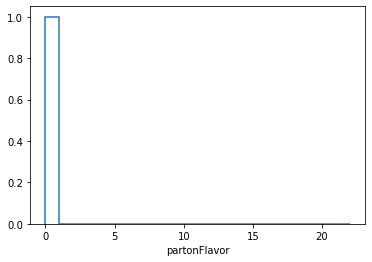

In [61]:
selectedEvents = events

subsamples = flavors # , 'untagged2', 'untagged3']
# flavour_axis = hist.axis.StrCategory(subsamples, growth=False, name="jet_flav", label=r"jet_flavour")  ###not completelly sure if defining an axis is better than doing through a dictionary of subsamples. See, https://github.com/CoffeaTeam/coffea/discussions/705
pt_gen_axis = hist.axis.Variable(ptbins, name="pt_gen", overflow=True, underflow=True, label=r"$p_{T,gen}$")
#         pt_reco_axis = hist.axis.Variable(ptbins, name="pt_reco", overflow=True, underflow=True, label=r"$p_{T,reco}$")
ptresponse_axis = hist.axis.Regular( 100, 0, 2.5, overflow=True, underflow=True, name="ptresponse", label="RECO / GEN response")
jeteta_axis = hist.axis.Variable(etabins, name="jeteta", label=r"Jet $\eta$")


output = {'ptresponse_'+samp:hist.Hist(pt_gen_axis, ptresponse_axis, jeteta_axis, storage="weight", name="Counts")
          for samp in subsamples}

for samp in subsamples:
    output['reco_pt_sumwx_'+samp] = hist.Hist(pt_gen_axis, jeteta_axis, storage="weight", name="Counts")


# events.Generator.weight
# events.GenJet.partonFlavour[0]
hi = hist.Hist.new.Reg(22, 0, 22, flow=True, name="partonFlavor").Double()
# part_flav = events.Jet.matched_gen.partonFlavour

jets = events.Jet

jet_gen_match_mask = ~ak.is_none(jets.matched_gen,axis=1)
# At least one matched (dressed) electron/muon found
dressed_electron_mask = ak.sum(ak.is_none(jets.matched_electrons,axis=2), axis=2)==2
dressed_muon_mask     = ak.sum(ak.is_none(jets.matched_muons,axis=2), axis=2)==2
jet_mask = jet_gen_match_mask  & dressed_electron_mask & dressed_muon_mask
            
jets = jets[jet_mask]

# jet_gen_match_mask = ~ak.is_none(events.Jet.matched_gen,axis=1)
# jets = jets[jetpt_mask]

jet_pt_mask = jets.matched_gen.pt>15
## funny workaround to change the ak.type of jet_pt_mask from '10 * var * ?bool' to '10 * var * bool'
## otherwise after the correction .matched_gen field is not found.
jet_pt_mask_shape = ak.num(jet_pt_mask)
jet_pt_mask_np = ak.flatten(jet_pt_mask).to_numpy()
jet_pt_mask = ak.unflatten(jet_pt_mask_np.data, jet_pt_mask_shape)
jets = jets[jet_pt_mask]

drs, _ = jets.metric_table(jets, return_combinations=True, axis=1)
jet_iso_mask = ~ ak.any((1e-10<drs) & (drs<0.8), axis=2 )
jets = jets[jet_iso_mask]

part_flav = jets.matched_gen.partonFlavour

sel_jets = jets
sel_jets['pt_raw'] = (1 - sel_jets['rawFactor']) * sel_jets['pt']     #raw pt. pt before the corrects applied to data
sel_jets['mass_raw'] = (1 - sel_jets['rawFactor']) * sel_jets['mass']
sel_jets['pt_gen'] = ak.values_astype(ak.fill_none(sel_jets.matched_gen.pt, 0), np.float32)
sel_jets['rho'] = ak.broadcast_arrays(events.fixedGridRhoFastjetAll, sel_jets.pt)[0]
events_cache = events.caches[0]

reco_jets = jet_factory.build(sel_jets, lazy_cache=events_cache)
gen_jets = reco_jets.matched_gen

jets = reco_jets

shapes_jets = ak.num(gen_jets.pt) #for event weights
gen_jetpt  = ak.flatten(gen_jets.pt).to_numpy( allow_missing=True)
gen_jeteta = ak.flatten(gen_jets.eta).to_numpy( allow_missing=True)
jetpt      = ak.flatten(reco_jets.pt).to_numpy( allow_missing=True)
jeteta     = ak.flatten(reco_jets.eta).to_numpy( allow_missing=True)

# etabins_abs = etabins[(len(etabins)-1)//2:] ##the positive eta bins
ptresponse_np = jetpt / gen_jetpt
# correction_pos_pt = (len(self.ptbins_closure)
#                       - np.count_nonzero(np.array(gen_jetpt, ndmin=2).transpose() < self.ptbins_closure, axis=1))
# correction_pos_eta = (len(self.etabins_closure)
#                       - np.count_nonzero(np.abs(np.array(gen_jeteta, ndmin=2).transpose()) < self.etabins_closure, axis=1))

ptresponse_np = jetpt / gen_jetpt #/ self.closure_corr[correction_pos_pt, correction_pos_eta]

jet_flavour = reco_jets.partonFlavour
#         jet_flavour = reco_jets.LHE_Flavour2
#         jet_flavour = reco_jets.LHE_Flavour

try:
    weights = selectedEvents.LHEWeight.originalXWGTUP
except AttributeError: ### no LHEWeight.originalXWGTUP in madgraph herwig but Generator.weight instead
    weights = selectedEvents.Generator.weight

weights2 = np.repeat(weights, shapes_jets)
masks = {}
masks = {flav: ak.flatten((jet_flavour == flavor2partonNr[flav] )).to_numpy( allow_missing=True)
         for flav in flavors if 'unmatched' not in flav}
from functools import reduce
masks['unmatched'] = reduce(lambda x, y: x+y, masks.values()) == 0 ## find the jets that are not taggeed




ptresponses     = { sample: ptresponse_np[masks[sample]]        for sample in subsamples }
gen_jetpts      = { sample: gen_jetpt[masks[sample]]            for sample in subsamples }
gen_jetetas     = { sample: gen_jeteta[masks[sample]]           for sample in subsamples }
jetpts          = { sample: jetpt[masks[sample]]                for sample in subsamples }
weights_jet     = { sample: weights2[masks[sample]]             for sample in subsamples }

# print("Try to np:")
# ak.flatten(gen_jetpt).to_numpy()
# print("Try to np with Allow missing:")
# ak.flatten(gen_jetpt).to_numpy(allow_missing=True)
# print("Before filling:")

########### Filling of the histograms ###############

sums = {}
for sample in subsamples:
    output['ptresponse_'+sample].fill(pt_gen=gen_jetpts[sample],
                                      jeteta=gen_jetetas[sample],
                                      ptresponse=ptresponses[sample],
#                                               weight=weights_jet[sample]
                                     )

    output['reco_pt_sumwx_'+sample].fill(pt_gen=gen_jetpts[sample],
                                         jeteta=gen_jetetas[sample],
                                         weight=jetpts[sample] #*weights_jet[sample]
                                        )
    sums[sample] =  np.sum(masks[sample])


jetpt_mask = (jets.pt>50) & (jets.pt<200)

hi.fill(np.abs(ak.flatten(part_flav)))
(hi/hi.sum()).plot1d()
# events.Jet.matched_gen[0].hadronFlavour
# events.LHEWeight.originalXWGTUP

In [62]:
sums

{'b': 29,
 'c': 74,
 's': 88,
 'u': 370,
 'd': 279,
 'bbar': 34,
 'cbar': 69,
 'sbar': 106,
 'ubar': 156,
 'dbar': 171,
 'g': 1663,
 'unmatched': 1161}

In [153]:
def get_file_dict(add_tag):
    if "_QCD-MG" in add_tag:
        if add_tag=='_DY-MG-Her':
            dataset_list_file = '../fileNames/QCD_Herwig_20UL18/xsecs_QCD_Herwig_corrected.txt'
        else:
            dataset_list_file = '../fileNames/QCD_MG_Py8_20UL18/xsecs_QCD_MG_py8.txt'
        with open(dataset_list_file) as f:
            lines = f.readlines()
        lines_split = [line.split() for line in lines]
        file_dict = {lineii[1]: xsecstr2float(lineii[2]) for lineii in lines_split }
    else:
        file_dict = 1
    return file_dict

# output_orig = output
def sum_output(output, add_tag, file_dict):
    if "_QCD-MG" in add_tag:
        response_sums = {key:sum(dictionary_pattern(output[key], "ptresponse_").values()).sum().value for key in output.keys()}
        scale_factors = hist_div(file_dict, response_sums)
        all_histo_keys = output[next(iter(output.keys()))].keys()
        result = {histo_key:sum_subhist(output, histo_key, scale_factors) for histo_key in all_histo_keys }
        output = result
    elif len(output.keys())==1:
        output = output[list(output.keys())[0]]
    return output

def combine_flavors(output, sumeta=True):
    all_samples = [key[11:] for key in output.keys() if 'ptresponse' in key]
    hists = {}
    # (output['ptresponse_u']+output['ptresponse_ubar']+output['ptresponse_d']+output['ptresponse_dbar'])[:,sum,sum]
    hists['q'] = (output['ptresponse_u']+output['ptresponse_ubar']+output['ptresponse_d']+output['ptresponse_dbar']+output['ptresponse_s']+output['ptresponse_sbar'])[:,sum,:]
    hists['g'] = (output['ptresponse_g'])[:,sum,:]
    hists['b'] = (output['ptresponse_b']+output['ptresponse_bbar'])[:,sum,:]
    hists['c'] = (output['ptresponse_c']+output['ptresponse_cbar'])[:,sum,:]
    
    try:
        hists['untagged'] = output.get('ptresponse_untagged')[:,sum,:]
    except(TypeError):
        hists['untagged'] = 0
        
#     if len(untagged)>0: 
#         hists['untagged'] = (untagged)[:,sum,sum]
#     else:
#         hists['untagged'] = 0

    all_responses = {samp:output['ptresponse_'+samp] for samp in all_samples}
    hists['all'] = sum(all_responses.values())[:,sum,:]
    
    if sumeta:
        for key in hists.keys():
            hists[key] = hists[key][:,sum]
    return hists

In [154]:
# output = get_output(add_tag)
add_tag = 'blah'
file_dict = get_file_dict(add_tag)
output2 = sum_output(output, add_tag, file_dict)
    
for key in output.keys():
    if 'response' in key:
        response_key = key
        break
        
fine_etabins=False
one_bin=False
if fine_etabins==True:
    ptbins = np.array([15, 40, 150, 400, 4000, 10000])
    ptbins_c = (ptbins[:-1]+ptbins[1:])/2
    etabins = output[response_key].axes["jeteta"].edges #output['ptresponse'].axis('jeteta').edges()
elif one_bin==True:
    ptbins = np.array([15, 10000])
    ptbins_c = (ptbins[:-1]+ptbins[1:])/2
    etabins = np.array([-5, -3, -2.5, -1.3, 0, 1.3, 2.5, 3, 5])
    etabins = np.array([etabins[0], 0, etabins[-1]])
#     etabins = np.array([etabins[3], 0, etabins[-4]])
else:
    ptbins = output[response_key].axes["pt_gen"].edges 
#     ptbins = ptbins[2:] #because there is a pt cut on pt gen and no point of fitting and plotting below that
    ptbins_c = output[response_key].axes['pt_gen'].centers
#     etabins = np.array([-5.191, -3.489, -3.139, -2.853,   -2.5, -2.322,  -1.93, -1.653, -1.305, -0.783,      0,  0.783,  1.305,  1.653,   1.93,  2.322,    2.5,  2.853,  3.139,  3.489, 5.191])
    etabins = np.array([-5.191, -3, -2.5, -1.3, 0, 1.3, 2.5, 3, 5.191])
    
hists = combine_flavors(output2)

In [155]:
import matplotlib.pyplot as plt
import matplotlib as mpl

/tmp/anpotreb/ipykernel_20949/3908673862.py:13: RuntimeWarning: invalid value encountered in true_divide
  qfracs[flav] = (hists1[flav].values()/qfracs['all'])[plot_range]


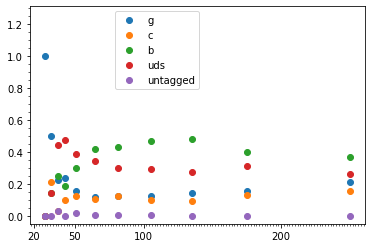

In [156]:
# samples = ["_DY-MG-Her", "_DY-MG-Py"]
# hists1 = hists_dict[samples[0]]
# hists2 = hists_dict[samples[1]]
hists1 = hists

plot_range = range(0, len(ptbins_c)-9)# if 'DY' in "".join(samples) else range(0, len(ptbins_c)-6)
ptbins_c_plot = ptbins_c[plot_range]

qfracs = {'all': hists1['all'].values()}
for flav in hists1.keys():
    if 'all' in flav:
        continue
    qfracs[flav] = (hists1[flav].values()/qfracs['all'])[plot_range]

points_ls = [] 
fig, ax = plt.subplots()
for flav, lab in zip(['g', 'c', 'b', 'q', 'untagged'], ['g', 'c', 'b', 'uds', 'untagged']):
    if 'all' in flav:
        continue
    points = ax.plot(ptbins_c_plot, qfracs[flav], 'o', linewidth=0, label=lab)
    if 'g' == flav:
        points_ls.append(points[0])
    
# qfracs2 = {'all': hists2['all'].values()}
# for flav in hists2.keys():
#     if 'all' in flav:
#         continue
#     try:
#         qfracs2[flav] = (hists2[flav].values()/qfracs2['all'])[plot_range]
#     except(AttributeError):
#         qfracs2[flav] = [0]*len(plot_range)

# ax.set_prop_cycle(None)
# for flav, lab in zip(['g', 'c', 'b', 'q', 'untagged'], ['g', 'c', 'b', 'uds', 'untagged']):
#     if 'all' in flav:
#         continue
#     points = ax.plot(ptbins_c_plot, qfracs2[flav], linewidth=0, mfc='none', markeredgewidth=1.2)
#     if 'g' == flav:
#         points_ls.append(points[0])
# ax.set_xscale('log')
# ax.set_xlabel('$p_{T,Gen}$ (GeV)')
# ax.set_ylabel("Flavor fraction")
# # fig.suptitle("Blaaah $x^2_5$")

xlims = ax.get_xlim()

ax.set_xticks([])
ax.set_xticks([10, 20, 50, 100, 200, 500, 1000, 2000, 5000])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
# legend1 = ax.legend(points_ls, [samples[0][1:], samples[1][1:]], loc="upper left", bbox_to_anchor=(0.48, 1))
leg2 = ax.legend(ncol=1, loc='upper right', bbox_to_anchor=(0.52, 1))
# ax.add_artist(legend1)
# ax.add_artist(leg2)

ylims = ax.get_ylim()
ax.set_xlim(xlims)
ax.set_ylim(ylims[0], ylims[1]*1.25)

# ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
# hep.cms.label("Something", data=True, lumi="xx", year=2018, fontsize=15.6/1.1)

# import os
# if not os.path.exists("../fig/fractions"):
#     os.mkdir("../fig/fractions")
    
# fig_name = '../fig/fractions/fraction'+"".join(samples)
# print("Saving plot with the name = ", fig_name)
# plt.savefig(fig_name+'.pdf');
# plt.savefig(fig_name+'.png');

# ptbins_c
1;

In [50]:
qfracs

{'all': array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.600e+01,
        5.200e+01, 1.900e+02, 1.095e+03, 1.856e+03, 1.717e+03, 1.620e+03,
        6.810e+02, 3.890e+02, 4.000e+01, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 'q': array([       nan,        nan,        nan,        nan, 0.        ,
        0.125     , 0.30769231, 0.32105263, 0.25753425, 0.21228448,
        0.1875364 , 0.18148148, 0.17180617, 0.19023136, 0.125     ,
               nan, 0.        ,        nan,        nan]),
 'g': array([       nan,        nan,        nan,        nan, 1.        ,
        0.4375    , 0.15384615, 0.15789474, 0.10228311, 0.07543103,
        0.08386721, 0.07592593, 0.09104258, 0.09768638, 0.15      ,
               nan, 0.        ,        nan,        nan]),
 'b': array([       nan,        nan,        nan,        nan, 0.        ,
        0.125     , 0.17307692, 0.12

In [31]:
output

{'ptresponse_b': Hist(
   Variable(array([   15.,    17.,    20.,    23.,    27.,    30.,    35.,    40.,
           45.,    57.,    72.,    90.,   120.,   150.,   200.,   300.,
          400.,   550.,   750.,  1000.,  1500.,  2000.,  2500.,  3000.,
         3500.,  4000.,  4500.,  5000., 10000.]), name='pt_gen', label='$p_{T,gen}$'),
   Regular(100, 0, 2.5, name='ptresponse', label='RECO / GEN response'),
   Variable(array([-5.191, -4.889, -4.716, -4.538, -4.363, -4.191, -4.013, -3.839,
        -3.664, -3.489, -3.314, -3.139, -2.964, -2.853, -2.65 , -2.5  ,
        -2.322, -2.172, -2.043, -1.93 , -1.83 , -1.74 , -1.653, -1.566,
        -1.479, -1.392, -1.305, -1.218, -1.131, -1.044, -0.957, -0.879,
        -0.783, -0.696, -0.609, -0.522, -0.435, -0.348, -0.261, -0.174,
        -0.087,  0.   ,  0.087,  0.174,  0.261,  0.348,  0.435,  0.522,
         0.609,  0.696,  0.783,  0.879,  0.957,  1.044,  1.131,  1.218,
         1.305,  1.392,  1.479,  1.566,  1.653,  1.74 ,  1.83 ,  1.93 ,
   

In [224]:
values = hi.view(flow=True)[1:]
np.vstack([hi.axes.edges[0], values]).T[7]
values[7]/values.sum()

array([8.8817842e-16, 2.2350000e+03])

0.11785488293608944

In [230]:
jets.pt

<Array [[140, 72.4, 66.1], ... 217, 150, 67.8]] type='3000 * var * float32[param...'>

Hist(Regular(29, -7, 22, name='partonFlavor'), storage=Double()) # Sum: 17975.0

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f65c81cc490>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

0.12022253129346315

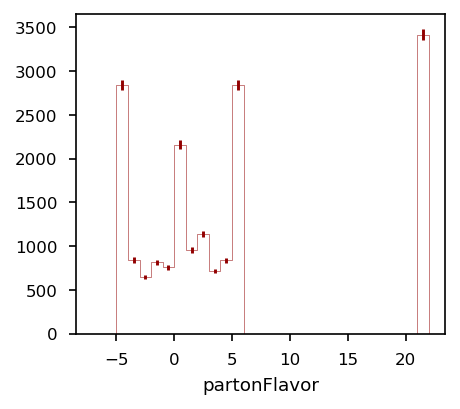

In [237]:
hi = hist.Hist.new.Reg(29, -7, 22, flow=True, name="partonFlavor").Double()
jets = events.Jet[:,:8]
part_flav = jets.matched_gen.partonFlavour
jet_gen_match_mask = ~ak.is_none(jets.matched_gen, axis=1)
part_flav = part_flav[jet_gen_match_mask]

hi.fill(ak.flatten(part_flav))
hi.plot1d()
# events.Jet.matched_gen[0].hadronFlavour
# events.LHEWeight.originalXWGTUP

values = hi.view(flow=True)[1:]
# np.vstack([hi.axes.edges[0], values]).T[7]
values[7]/values.sum()

In [ ]:
hi = hist.Hist.new.Reg(29, -7, 22, flow=True, name="partonFlavor").Double()
jets = events.Jet[:,:3]
part_flav = jets.matched_gen.partonFlavour
jet_gen_match_mask = ~ak.is_none(jets.matched_gen, axis=1)
part_flav = part_flav[jet_gen_match_mask]

hi.fill(ak.flatten(part_flav))
hi.plot1d()
# events.Jet.matched_gen[0].hadronFlavour
# events.LHEWeight.originalXWGTUP

values = hi.view(flow=True)[1:]
# np.vstack([hi.axes.edges[0], values]).T[7]
values[7]/values.sum()

In [373]:
# ak.min(events.LHEWeight.originalXWGTUP)
# ak.max(events.LHEWeight.originalXWGTUP)

# ak.min(events.HTXS)
# ak.max(events.HTXS)
# dir(events.Jet) #.HTXS
# dir(events.LHE) #.HTXS
# events.LHE.HT
# ak.min(events.LHE.HT)

In [284]:
import matplotlib.pyplot as plt
from plotters.pltStyle import pltStyle
pltStyle(style='hep')
# # plt.rcParams['figure.subplot.left'] = 0.162
# plt.rcParams['figure.dpi'] = 150

In [285]:
try:
    weights = events.LHEWeight.originalXWGTUP
except AttributeError: ### no LHEWeight.originalXWGTUP in madgraph herwig but Generator.weight instead
    weights = events.Generator.weight

h_pt = hist.Hist.new.Reg(50, 0, 1000, overflow=True, underflow=True, name="$p_{T,gen}$").Double()
h_pt.fill(ak.flatten(events.Jet.pt));

h_pt_weights = hist.Hist.new.Reg(50, 0, 5000, overflow=True, underflow=True, name="$p_{T,gen}$").Double()
h_pt_weights.fill(ak.flatten(events.Jet.pt), weight=np.repeat(weights, ak.num(events.Jet.pt)));

# h_HT = hist.Hist.new.Reg(50, 0, 1000, overflow=True, underflow=True, name="$HT$").Double()
# h_HT.fill(events.LHE.HT, weight=weights);
    
h_weights = hist.Hist.new.Reg(10, ak.min(weights), ak.max(weights), overflow=True, underflow=True, name="LHE_weight").Double()
h_weights.fill(weights);

In [261]:
# h.axes.edges

In [255]:
from scipy.optimize import curve_fit

def func(x, a, b):
    y = a*x + b
    return y

def func_exp(x, a, b):
    y = x**a * np.exp(b)
    return y

In [290]:
# h_pt_Py = h_pt
import matplotlib as mpl

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f653b881a60>, errorbar=None, legend_artist=None)]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f653b881d30>, errorbar=None, legend_artist=None)]

(16.446803188537785, 1216.0417906586579)

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])

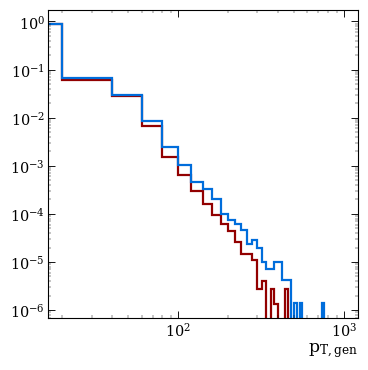

In [334]:
fig, ax = plt.subplots()

h_pt_Py_norm = h_pt_Py/h_pt_Py.sum()
h_pt_Her_norm = h_pt/h_pt.sum()
h_pt_Py_norm.plot1d(ax=ax, linewidth=1.6, label='DY MG+Py')
h_pt_Her_norm.plot1d(ax=ax, linewidth=1.6, label='DY MG+Her')
# h_pt_weights.plot1d(ax=ax, linewidth=1.6, label='weights')

xvals = h_pt_weights.axes.centers[0]
xvals = xvals[:np.searchsorted(xvals, 1000, side='right')]
yvals = h_pt_weights.values()[:np.searchsorted(xvals, 1000, side='right')]
# alpha = curve_fit(func, xdata = np.log(xvals), ydata = np.log(yvals))[0]
xvals = h_pt_weights.axes.centers[0]

ax.set_yscale('log')
ax.set_xscale('log')
ax.get_xlim()

ax.get_xticks()

In [310]:
# h_pt_Py_norm
# h_pt_Her_norm

In [379]:
h_pt_Py_norm.values()>h_pt_Her_norm.values()
h_pt_Py_norm.values()
h_pt_Py_norm.axes.edges
h_pt_Her_norm.values()

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

array([9.01825570e-01, 6.01215231e-02, 2.83994193e-02, 6.72162713e-03,
       1.55921051e-03, 6.33216495e-04, 3.02309810e-04, 1.57963685e-04,
       9.39611573e-05, 6.12790156e-05, 4.35761889e-05, 2.58733621e-05,
       1.49793149e-05, 1.49793149e-05, 1.08940472e-05, 2.72351181e-06,
       4.08526771e-06, 0.00000000e+00, 2.72351181e-06, 1.36175590e-06,
       0.00000000e+00, 0.00000000e+00, 2.72351181e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

(array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,
         360.,  380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,
         540.,  560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,
         720.,  740.,  760.,  780.,  800.,  820.,  840.,  860.,  880.,
         900.,  920.,  940.,  960.,  980., 1000.]))

array([8.88866520e-01, 6.73713286e-02, 3.02780308e-02, 8.54125693e-03,
       2.51437034e-03, 1.02771016e-03, 4.57542196e-04, 3.26614737e-04,
       2.04134211e-04, 9.71397278e-05, 7.60223956e-05, 6.05363521e-05,
       4.64581307e-05, 2.39329764e-05, 2.81564428e-05, 1.97095100e-05,
       9.85475499e-06, 7.03911071e-06, 7.03911071e-06, 9.85475499e-06,
       9.85475499e-06, 4.22346642e-06, 4.22346642e-06, 4.22346642e-06,
       0.00000000e+00, 1.40782214e-06, 0.00000000e+00, 1.40782214e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.40782214e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

[1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


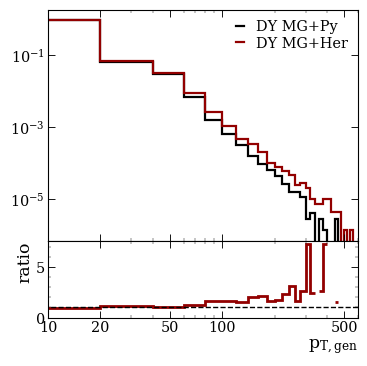

In [386]:
fig = plt.figure()
gs = fig.add_gridspec(nrows=2, ncols=1, hspace=0, height_ratios=[3, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# fig, ax = plt.subplots()

h_pt_Py_norm = h_pt_Py/h_pt_Py.sum()
h_pt_Her_norm = h_pt/h_pt.sum()
h_pt_Py_norm.plot1d(ax=ax1, linewidth=1.6, label='DY MG+Py', color='k')
h_pt_Her_norm.plot1d(ax=ax1, linewidth=1.6, label='DY MG+Her')
# h_pt_weights.plot1d(ax=ax, linewidth=1.6, label='weights')

# xvals = h_pt_weights.axes.centers[0]
# xvals = xvals[:np.searchsorted(xvals, 1000, side='right')]
# yvals = h_pt_weights.values()[:np.searchsorted(xvals, 1000, side='right')]
# alpha = curve_fit(func, xdata = np.log(xvals), ydata = np.log(yvals))[0]
# xvals = h_pt_weights.axes.centers[0]
# np.linspace(xvals[0], xvals[-1],100)
# ax.plot(xvals, func_exp(xvals, alpha[0], alpha[1]), label=f'fit, a = {np.round(alpha[0],3)}')


# print(f'alpha = {alpha}')

# ax.legend();
ax1.set_yscale('log')
ax1.set_xscale('log')

ax2.hlines(1,1, 1000, linestyles='--',color="black",
        linewidth=1,)
print(ax1.get_xticks())
data_model_ratio = h_pt_Her_norm/h_pt_Py_norm
# data_model_ratio_unc = stds / yvals[0]


data_model_ratio.plot1d(ax=ax2, linewidth=2, label="generator_weight")
# ax2.set_ylim(0.01,2000)
ax2.set_xscale('log')
ax2.set_ylabel("ratio")

print(ax2.get_xticks())

ax2.set_xticks([10, 20, 50, 100, 500, 1000, 5000])
ax1.set_xticks(ax2.get_xticks())
ax1.set_xlim(10,600)
ax2.set_xlim(ax1.get_xlim())
# print(ax2.get_xticks())
# print(ax.get_xticks())
# print(ax1.get_ylim())
# ax1.set_ylim(0.001,1)
ax1.set_xticklabels([])
ax2.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax1.legend()
1;

In [307]:
# data_model_ratio

In [278]:
data_model_ratio.values()

array([0.9856302 , 1.12058586, 1.06614964, 1.2707127 , 1.61259197,
       1.62299967, 1.51348775, 2.06765712, 2.17253827, 1.58520379,
       1.74458569, 2.33971726, 3.10148567, 1.59773504, 2.5845714 ,
       7.23679991, 2.41226664,        inf, 2.5845714 , 7.23679991,
              inf,        inf, 1.55074284,        inf,        nan,
              inf,        nan,        inf,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        inf,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fe1d42657c0>, errorbar=None, legend_artist=None)]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fe22d440070>, errorbar=None, legend_artist=None)]

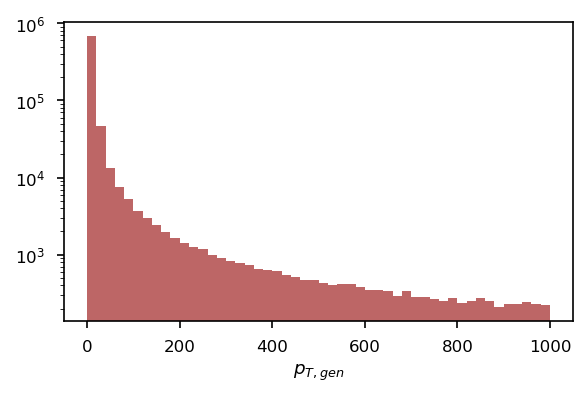

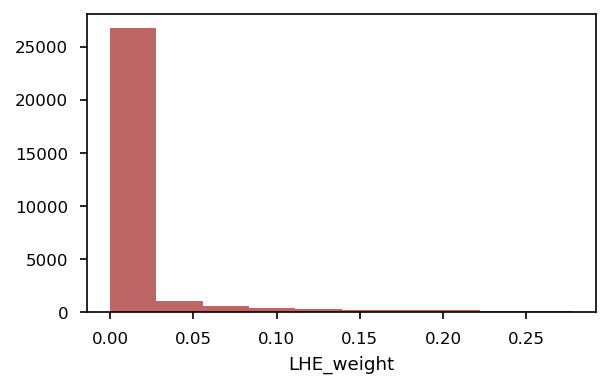

In [345]:



fig, ax = plt.subplots();
h_pt.plot1d(ax=ax, label='dataset', histtype='fill', alpha=0.6)
ax.set_yscale('log')

# fig, ax = plt.subplots();
# h_HT.plot1d(ax=ax, label='dataset', histtype='fill', alpha=0.6)
# ax.set_yscale('log')

fig, ax = plt.subplots();
h_weights.plot1d(ax=ax, label='dataset', histtype='fill', alpha=0.6)
# ax.set_yscale('log')

### Stitching the samples

In [31]:
# xsecs = {
#     "50to100": 56530.0,
#     "100to200": 11370.0,
#     "200to300": 883.5,
#     "300to500": 259.6,
#     "500to700": 23.63,
#     "700to1000": 4.943,
#     "1000to1500": 0.8013,
#     "1500to2000": 0.06815,
#     "2000toInf": 0.01245,
# }

# dataset_list_file = 'fileNames/QCD_MG_Py8_20UL18/xsecs_QCD_MG_py8.txt'
# dataset_list_file = 'fileNames/QCD_Herwig_20UL18/xsecs_QCD_Herwig.txt'
# with open(dataset_list_file) as f:
#     lines = f.readlines()
# lines_split = [line.split() for line in lines]
# file_dict = {lineii[1]: float(lineii[2]) for lineii in lines_split }

# xsecs = file_dict
# xsec_factors = {key:1 for key in xsecs.keys()}

In [30]:
def xsecstr2float(str_input):
    str_split = str_input.split('*')
    try:
        if len(str_split)==1:
            xsec = float(str_split[0])
        elif len(str_split)==2:
            xsec = float(str_split[0])*float(str_split[1])
        else:
            raise ValueError
    except:
        raise ValueError("Check your input files. Cross-secton not correctly defined."+
                         f" It has to be either a number or a number times a factor. Given: {str_input}")
    return xsec

In [36]:
dataset = 'fileNames/QCD_MG_Py8_20UL18/xsecs_QCD_MG_py8.txt'
dataset = 'fileNames/QCD_Herwig_20UL18/xsecs_QCD_Herwig.txt'
xrootdstr = 'root://xrootd-cms.infn.it/'
Nfiles = 1
filesets = {}


### if dataset striched together from a set of datasets where the cross-section for each is given in `dataset`
dataset_path = '/'.join(dataset.split('/')[:-1])
with open(dataset) as f:
    lines = f.readlines()
lines_split = [line.split() for line in lines]
xsec_dict = {lineii[1]: xsecstr2float(lineii[2]) for lineii in lines_split }
file_dict = {lineii[1]: lineii[0] for lineii in lines_split }
for key in file_dict.keys():
    data_name = file_dict[key]
    with open(dataset_path+'/'+data_name) as f:
        rootfiles = f.read().split()
    fileslist = [xrootdstr + file for file in rootfiles]
    fileslist = fileslist[:Nfiles]
    filesets[key] = fileslist[0]

In [37]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

from coffea.jetmet_tools import JetCorrectionUncertainty #FactorizedJetCorrector
from coffea.jetmet_tools import JECStack, CorrectedJetsFactory

from coffea.lookup_tools import extractor

In [38]:
HT_gen_axis = hist.axis.Regular(600, 50, 3050, overflow=True, underflow=True, name="$HT$")
h_HT = hist.Hist(HT_gen_axis, name="Counts")
h_HT_theory = hist.Hist(HT_gen_axis, name="Counts")
# xrootdstr = 'root://xrootd-cms.infn.it/'

# hists_HT = {}

for key in xsec_dict.keys():
# for key in ['HT50to100', 'HT1000to1500']:
    h_HT_tmp = hist.Hist(HT_gen_axis, name="Counts")
    h_HT_theory_tmp = hist.Hist(HT_gen_axis, name="Counts")

    
    print(f'key = {key}')
    filename=filesets[key] #f'fileNames/QCD_Herwig_20UL18/fileNames_QCD_HT{key}_20UL18_JMENano_Herwig.txt'
    try:
        events = NanoEventsFactory.from_root(
            filename,
            schemaclass=NanoAODSchema.v6,
#             entry_stop=10000,
        ).events()
        h_HT_tmp.fill(events.LHE.HT, weight=events.LHEWeight.originalXWGTUP);
        h_HT_theory_tmp.fill(events.LHE.HT) #, weight=xsec_dict[key]);
    except OSError:
        print("Stupid xrootd failed. Please retry this sample later.")
        continue
    
    hists_HT[key] = h_HT_theory_tmp/len(events)
    
    h_HT = h_HT+h_HT_tmp/len(events)
    h_HT_theory = h_HT_theory+h_HT_theory_tmp/len(events)*xsec_dict[key]
    
    
    print(f"mean LHEweight = {ak.mean(events.LHEWeight.originalXWGTUP)}, xsection = {xsec_dict[key]}, len events = {len(events)}")

    # events.keys()

key = HT50to100


Plugin version SecClnt v5.5.0 is incompatible with secztn v5.6.0 (must be <= 5.5.x) in sec.protocol libXrdSecztn-5.so
Plugin version SecClnt v5.5.0 is incompatible with secztn v5.6.0 (must be <= 5.5.x) in sec.protocol libXrdSecztn-5.so


Stupid xrootd failed. Please retry this sample later.
key = HT100to200


Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 16042234443.105469

Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 398995.0

mean LHEweight = 40206.61656411734, xsection = 11370.0, len events = 398995
key = HT200to300


Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 1810285042.8537598

Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 466216.0

mean LHEweight = 3882.932340374419, xsection = 883.5, len events = 466216
key = HT300to500


Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 302093629.64123535

Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 400615.0

mean LHEweight = 754.0747700410618, xsection = 259.6, len events = 400615
key = HT500to700


Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 22247956.868385315

Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 295904.0

mean LHEweight = 75.18639829133772, xsection = 23.63, len events = 295904
key = HT700to1000


Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 3896247.067638397

Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 199148.0

mean LHEweight = 19.56458387731737, xsection = 4.943, len events = 199148
key = HT1000to1500


Plugin version SecClnt v5.5.0 is incompatible with secztn v5.6.0 (must be <= 5.5.x) in sec.protocol libXrdSecztn-5.so
Plugin version SecClnt v5.5.0 is incompatible with secztn v5.6.0 (must be <= 5.5.x) in sec.protocol libXrdSecztn-5.so
Plugin version SecClnt v5.5.0 is incompatible with secztn v5.6.0 (must be <= 5.5.x) in sec.protocol libXrdSecztn-5.so
Plugin version SecClnt v5.5.0 is incompatible with secztn v5.6.0 (must be <= 5.5.x) in sec.protocol libXrdSecztn-5.so


Stupid xrootd failed. Please retry this sample later.
key = HT1500to2000


Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 73605.63320842385

Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 241549.0

mean LHEweight = 0.30472340110081186, xsection = 0.06815, len events = 241549
key = HT2000toInf


Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 15168.862202376127 (15915.359948687255 with flow)

Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 253708.0 (266193.0 with flow)

mean LHEweight = 0.059788790170571725, xsection = 0.01245, len events = 266193


In [28]:
# hists_HT_QCD_MG_py8 = hists_HT

In [ ]:
from scipy.optimize import curve_fit

def func(x, a, b):
    y = a*x + b
    return y

def func_exp(x, a, b):
    y = x**a * np.exp(b)
    return y

In [96]:
import matplotlib.pyplot as plt
from pltStyle import pltStyle
pltStyle(style='paper')
plt.rcParams['figure.subplot.left'] = 0.162
plt.rcParams['figure.dpi'] = 150

In [97]:
plt.rcParams['figure.figsize'] = [3, 3.]  #Latex text width =0.7*page width = 8.2 inches
#        plt.rcParams['figure.subplot.wspace'] = 0.33
plt.rcParams['figure.subplot.top'] = 0.87
plt.rcParams['figure.subplot.bottom'] = 0.16
plt.rcParams['figure.subplot.right'] = 0.97
plt.rcParams['figure.subplot.left'] = 0.15

In [98]:
xsec_factors = {key:1 for key in xsec_dict.keys()}
xsecs_mod ={key: xsec_dict[key]*xsec_factors[key] for key in xsec_dict.keys()}

In [99]:
# yvals Es uzrakstīšu drusku vēlāk kopsavilkumu par to, ko man saka meitenes.



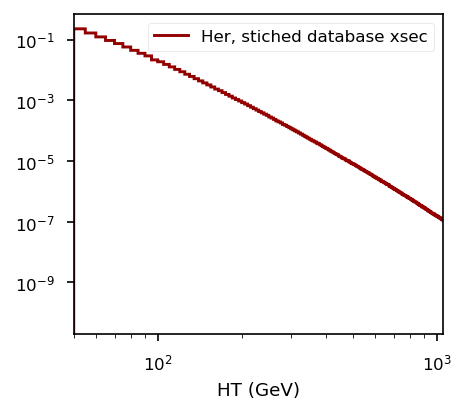

In [101]:
# fig = plt.figure()
# gs = fig.add_gridspec(nrows=2, ncols=1, hspace=0, height_ratios=[3, 1])
# ax = fig.add_subplot(gs[0])
# ax2 = fig.add_subplot(gs[1])
fig, ax = plt.subplots()


# xsecs_mod = {
#     "50to100": 56530.0,
#     "100to200": 11370.0*0.95,
#     "200to300": 883.5*1.1,
#     "300to500": 259.6*0.93,
#     "500to700": 23.63*1.06,
#     "700to1000": 4.943*1.15,
#     "1000to1500": 0.8013*1.35,
#     "1500to2000": 0.06815*1.6,
#     "2000toInf": 0.01245*1.75,
# }

# fig, ax = plt.subplots();
# plot = (h_HT/h_HT.sum()).plot1d(ax=ax, linewidth=1.4, label="Her, generator_weight")
histo = sum([hists_HT[key]*xsecs_mod[key] for key in hists_HT.keys()])
histo_old = sum([hists_HT[key]*xsecs[key] for key in hists_HT.keys()])
# histo = hists_HT['1500to2000']*xsecs_mod['1500to2000']+hists_HT['2000toInf']*xsecs_mod['2000toInf']
plot1 = (histo/histo.sum()).plot1d(ax=ax, linewidth=1.4, label="Her, stiched database xsec")
# plot2 = (histo_old/histo_old.sum()).plot1d(ax=ax, linewidth=1.4, label="Her, original database xsec")
# (h_pt_weights/h_pt_weights.sum()).plot1d(ax=ax, linewidth=1.4, label='Pyt, weights')
# (h_pt/h_pt.sum()).plot1d(ax=ax, linewidth=1.4, label='Pyt, no weights')
# for line in plt.gca().lines:
#     line.set_linewidth(10.)

xvals = histo.axes.centers[0]
xvals = xvals[:np.searchsorted(xvals, 10000, side='right')]
yvals = histo.values()[:np.searchsorted(xvals, 10000, side='right')]/histo.sum()
# yvals = histo.values()/histo.sum()
# alpha = curve_fit(func, xdata = np.log(xvals), ydata = np.log(yvals))[0]
xvals = histo.axes.centers[0]
# np.linspace(xvals[0], xvals[-1],100)
# ax.plot(xvals, func_exp(xvals, alpha[0], alpha[1]), label=f'fit, a = {np.round(alpha[0],3)}')


ax.legend();
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('HT (GeV)')
# ax2.set_xscale('log')

# # ax2.hlines(1,50, 1000, linestyles='--',color="black",
# #         linewidth=1,)
# # ax2.set_xlim(1950,2050)
ax.set_xlim(50,1050)
# # ax.set_ylim(8e-4,1.5e-3)

# data_model_ratio = h_HT/h_HT.sum()/(histo/histo.sum())
# # data_model_ratio1 = h_HT/h_HT.sum()/(h_pt_weights/h_pt_weights.sum())
# # data_model_ratio2 = h_HT/h_HT.sum()/(h_pt/h_pt.sum())
# # data_model_ratio_unc = stds / yvals[0]


# data_model_ratio.plot1d(ax=ax2, linewidth=2, label="generator_weight")
# ax2.set_ylim(0.7,1.3)
# ax2.set_ylabel("ratio")
# # ax2.bar(
#     xvals,
#     2 * data_model_ratio_unc[0],
#     width=wd,
#     bottom=1.0 - data_model_ratio_unc[0],
#     fill=False,
#     linewidth=0,
#     edgecolor="gray",
#     hatch=10 * "/",
# )

# plot[0]
# plot1[0]
fig_name = "fig/spectrum2"
plt.savefig(fig_name+'.pdf');
plt.savefig(fig_name+'.png');
plt.show();


In [49]:
hists_HT

{'HT50to100': Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 1.0,
 'HT100to200': Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 1.0,
 'HT500to700': Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 1.0,
 'HT700to1000': Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 1.0,
 'HT1000to1500': Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 1.0,
 'HT1500to2000': Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 1.0,
 'HT2000toInf': Hist(Regular(600, 50, 3050, name='$HT$'), storage=Double()) # Sum: 1.0}

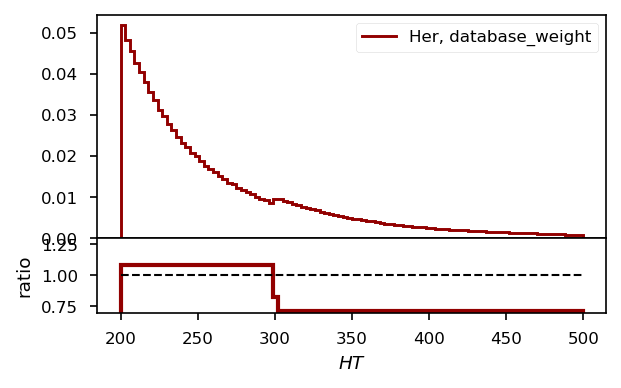

In [27]:
fig = plt.figure()
gs = fig.add_gridspec(nrows=2, ncols=1, hspace=0, height_ratios=[3, 1])
ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])


# fig, ax = plt.subplots();
# plot = (h_HT/h_HT.sum()).plot1d(ax=ax, linewidth=1.4, label="Her, generator_weight")
plot1 = (h_HT_theory/h_HT_theory.sum()).plot1d(ax=ax, linewidth=1.4, label="Her, database_weight")
# (h_pt_weights/h_pt_weights.sum()).plot1d(ax=ax, linewidth=1.4, label='Pyt, weights')
# (h_pt/h_pt.sum()).plot1d(ax=ax, linewidth=1.4, label='Pyt, no weights')
# for line in plt.gca().lines:
#     line.set_linewidth(10.)

ax.legend();
# ax.set_yscale('log')

ax2.hlines(1,200, 500, linestyles='--',color="black",
        linewidth=1,)

data_model_ratio = h_HT/h_HT.sum()/(h_HT_theory/h_HT_theory.sum())
# data_model_ratio1 = h_HT/h_HT.sum()/(h_pt_weights/h_pt_weights.sum())
# data_model_ratio2 = h_HT/h_HT.sum()/(h_pt/h_pt.sum())
# data_model_ratio_unc = stds / yvals[0]


data_model_ratio.plot1d(ax=ax2, linewidth=2, label="generator_weight")
ax2.set_ylim(0.7,1.3)
ax2.set_ylabel("ratio")
# ax2.bar(
#     xvals,
#     2 * data_model_ratio_unc[0],
#     width=wd,
#     bottom=1.0 - data_model_ratio_unc[0],
#     fill=False,
#     linewidth=0,
#     edgecolor="gray",
#     hatch=10 * "/",
# )

# plot[0]
# plot1[0]
plt.show();

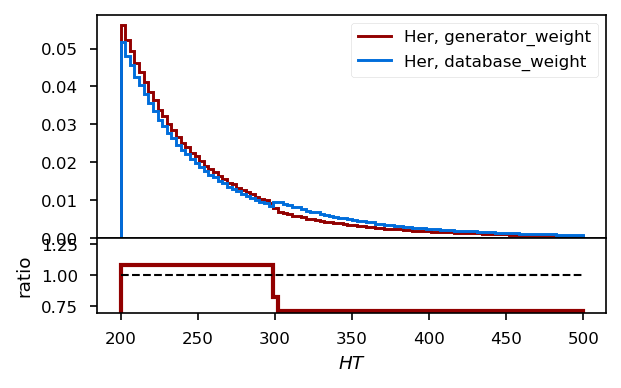

In [28]:
fig = plt.figure()
gs = fig.add_gridspec(nrows=2, ncols=1, hspace=0, height_ratios=[3, 1])
ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])


# fig, ax = plt.subplots();
plot = (h_HT/h_HT.sum()).plot1d(ax=ax, linewidth=1.4, label="Her, generator_weight")
plot1 = (h_HT_theory/h_HT_theory.sum()).plot1d(ax=ax, linewidth=1.4, label="Her, database_weight")
# (h_pt_weights/h_pt_weights.sum()).plot1d(ax=ax, linewidth=1.4, label='Pyt, weights')
# (h_pt/h_pt.sum()).plot1d(ax=ax, linewidth=1.4, label='Pyt, no weights')
# for line in plt.gca().lines:
#     line.set_linewidth(10.)

ax.legend();
# ax.set_yscale('log')

ax2.hlines(1,200, 500, linestyles='--',color="black",
        linewidth=1,)

data_model_ratio = h_HT/h_HT.sum()/(h_HT_theory/h_HT_theory.sum())
# data_model_ratio1 = h_HT/h_HT.sum()/(h_pt_weights/h_pt_weights.sum())
# data_model_ratio2 = h_HT/h_HT.sum()/(h_pt/h_pt.sum())
# data_model_ratio_unc = stds / yvals[0]


data_model_ratio.plot1d(ax=ax2, linewidth=2, label="generator_weight")
ax2.set_ylim(0.7,1.3)
ax2.set_ylabel("ratio")
# ax2.bar(
#     xvals,
#     2 * data_model_ratio_unc[0],
#     width=wd,
#     bottom=1.0 - data_model_ratio_unc[0],
#     fill=False,
#     linewidth=0,
#     edgecolor="gray",
#     hatch=10 * "/",
# )

# plot[0]
# plot1[0]
plt.show();

In [32]:
from coffea import util
output = util.load('out/CoffeaJERCOutputs_L5_Herwig-QCD.coffea')

In [1]:
# output

In [ ]:
output

In [76]:
ext = extractor()
ext.add_weight_sets([
    "* * Summer20UL18_V2_MC/Summer20UL18_V2_MC_L1FastJet_AK4PFchs.txt",
    "* * Summer20UL18_V2_MC/Summer20UL18_V2_MC_L2Relative_AK4PFchs.txt",
    "* * Summer20UL18_V2_MC/Summer20UL18_V2_MC_L3Absolute_AK4PFchs.txt",
#             "* * Summer20UL18_V2_MC/Summer19UL18_V5_MC_L2L3Residual_AK4PFchs.txt", #Doesn't do anything but for transparancy I add it
])
ext.finalize()

jec_stack_names = ["Summer20UL18_V2_MC_L1FastJet_AK4PFchs",
                   "Summer20UL18_V2_MC_L2Relative_AK4PFchs", 
                   "Summer20UL18_V2_MC_L3Absolute_AK4PFchs",
#                            "Summer19UL18_V5_MC_L2L3Residual_AK4PFchs",
                  ]

evaluator = ext.make_evaluator()

print("evaluator = ", evaluator)
print("evaluator keys = ", evaluator.keys())

jec_inputs = {name: evaluator[name] for name in jec_stack_names}
jec_stack = JECStack(jec_inputs)


### more possibilities are available if you send in more pieces of the JEC stack
# mc2016_ak8_jxform = JECStack(["more", "names", "of", "JEC parts"])

#         self.corrector = FactorizedJetCorrector(
#             Summer20UL18_V2_MC_L1FastJet_AK4PFchs=evaluator['Summer20UL18_V2_MC_L1FastJet_AK4PFchs'],
#             Summer20UL18_V2_MC_L2Relative_AK4PFchs=evaluator['Summer20UL18_V2_MC_L2Relative_AK4PFchs'],
#             Summer20UL18_V2_MC_L3Absolute_AK4PFchs=evaluator['Summer20UL18_V2_MC_L3Absolute_AK4PFchs'],
#         )

name_map = jec_stack.blank_name_map
name_map['JetPt'] = 'pt'
name_map['JetMass'] = 'mass'
name_map['JetEta'] = 'eta'
name_map['JetA'] = 'area'
name_map['ptGenJet'] = 'pt_gen'
name_map['ptRaw'] = 'pt_raw'
name_map['massRaw'] = 'mass_raw'
name_map['Rho'] = 'rho'


jet_factory = CorrectedJetsFactory(name_map, jec_stack)

df_csv = pd.read_csv('out_txt/Closure_L5_QCD_Pythia.coffea').set_index('etaBins')
closure_corr = df_csv.to_numpy().transpose()
closure_corr = np.pad(closure_corr,1,constant_values=1)
etabins_closure = df_csv.index.to_numpy() # np.array([0, 1.3, 2.5, 3, 5])
ptbins_closure = df_csv.columns.to_numpy('float')

evaluator =  <coffea.lookup_tools.evaluator.evaluator object at 0x7f2af721ed00>
evaluator keys =  dict_keys(['Summer20UL18_V2_MC_L1FastJet_AK4PFchs', 'Summer20UL18_V2_MC_L2Relative_AK4PFchs', 'Summer20UL18_V2_MC_L3Absolute_AK4PFchs'])


array([  15.,   17.,   20.,   23.,   27.,   30.,   35.,   40.,   45.,
         57.,   72.,   90.,  120.,  150.,  200.,  300.,  400.,  550.,
        750., 1000., 1500., 2000., 2500., 3000., 3500., 4000., 4500.,
       5000.])

In [54]:
subsamples = ['b', 'c', 'u', 'd', 's', 'g', 'bbar', 'cbar', 'ubar', 'dbar', 'sbar', 'untagged']
flavour_axis = hist.axis.StrCategory(subsamples, growth=False, name="jet_flav", label=r"jet_flavour")  ###not completelly sure if defining an axis is better than doing through a dictionary of subsamples. See, https://github.com/CoffeaTeam/coffea/discussions/705
pt_gen_axis = hist.axis.Variable(ptbins, name="pt_gen", overflow=True, underflow=True, label=r"$p_{T,gen}$")
#         pt_reco_axis = hist.axis.Variable(ptbins, name="pt_reco", overflow=True, underflow=True, label=r"$p_{T,reco}$")
ptresponse_axis = hist.axis.Regular( 100, 0, 2.5, overflow=True, underflow=True, name="ptresponse", label="RECO / GEN response")
jeteta_axis = hist.axis.Variable(etabins, name="jeteta", label=r"Jet $\eta$")

# self.subsamples = subsamples

#         self.for_memory_testing()
output = {'ptresponse_'+samp:hist.Hist(pt_gen_axis, ptresponse_axis, jeteta_axis, storage="weight", name="Counts")
          for samp in subsamples}
#         output['ptresponse'] = hist.Hist(pt_gen_axis, ptresponse_axis, jeteta_axis, storage="weight", name="Counts")
#         output['ptresponse'] = hist.Hist(flavour_axis,
#                                             pt_gen_axis, ptresponse_axis, jeteta_axis,
#                                             storage="weight", name="Counts")
# self.for_memory_testing()
### Store only the sums of values. Much simpler than storing the whole reco_pt histogram
for samp in subsamples:
    output['reco_pt_sumwx_'+samp] = hist.Hist(pt_gen_axis, jeteta_axis, storage="weight", name="Counts")
#         output['reco_pt_sumwx'] = hist.Hist(pt_gen_axis, jeteta_axis, storage="weight", name="Counts")
#         self.for_memory_testing()

cutflow_axis = hist.axis.StrCategory([], growth=True, name="cutflow", label="Cutflow Scenarios")
output['cutflow'] = hist.Hist(cutflow_axis, storage="weight", label="Counts")

# dataset = events.metadata['dataset']

# Event Cuts
# apply npv cuts
output['cutflow'].fill(cutflow='all_events', weight=len(events))

npvCut = (events.PV.npvsGood > 0)
pvzCut = (np.abs(events.PV.z) < 24)
rxyCut = (np.sqrt(events.PV.x*events.PV.x + events.PV.y*events.PV.y) < 2)

selectedEvents = events[npvCut & pvzCut & rxyCut]
output['cutflow'].fill(cutflow='selected_events', weight=len(selectedEvents))
# get GenJets and Jets
jets = selectedEvents.Jet
output['cutflow'].fill(cutflow='all_jets', weight=ak.sum(ak.num(jets)))

lhe_part_exists = False
#         try:
#                 events.LHEPart
#                 lhe_part_exists = True
#         except(AttributeError):
#                 print("LHEPart doesn't exist")
#         except:
#                 print("Error at LHE Part")

########### LHE Flavour2 derivation ###########
''' Algorithm of LHE_Flavour2:
Cuts all the outgoing LHE particles that have pdgId as quarks (except top) and gluons.
For each LHE particle finds the closest jet and gives the jet its flavour.
If a jet is marked by two or more LHE particles: assign -999
'''
#         lhe_part_exists = True 
if lhe_part_exists:
        LHE_flavour_2 = ak.zeros_like(jets.hadronFlavour)
        jet_shape2 = ak.num(jets.hadronFlavour)

        ## have to work with flattened objects as awkwards doesn not allow to modify it's entries
        LHE_flavour_np_2 = ak.flatten(LHE_flavour_2).to_numpy().copy()

        LHEPart = selectedEvents.LHEPart
        absLHEid = np.abs(LHEPart.pdgId)
        LHE_outgoing = LHEPart[(LHEPart.status==1) & ((absLHEid < 6) | (absLHEid == 21))]

        drs, [LHE_match, jets_match] = LHE_outgoing.metric_table(jets, return_combinations=True, axis=1)

        arms = ak.argmin(drs, axis=2) ## for each event, for each LHE particle, the closest jet index
        cums = np.cumsum(jet_shape2)[:-1]
        cums = np.append(0,cums)
        arms_flat = arms + cums ### positions of the matchet jets in the flattened list
        arms_np = ak.flatten(arms_flat).to_numpy().data
        LHE_match_flat = ak.flatten(LHE_match[:,:,:1].pdgId,axis=1)

        aa = count_2d(arms, ak.ArrayBuilder())
        aa_np = ak.flatten(aa).to_numpy()

        LHE_flavour_np_2 = ak.flatten(LHE_flavour_2).to_numpy().copy()
        LHE_flavour_np_2[arms_np[ak.num(LHE_match_flat)>0][aa_np==1]] = ak.flatten(LHE_match_flat)[aa_np==1]
        ### Some LHE particles might point to the same LHE partons. Those are kept unmatched.
        LHE_flavour_np_2[arms_np[ak.num(LHE_match_flat)>0][aa_np>1]] = -999 

        jets["LHE_Flavour2"] = ak.unflatten(LHE_flavour_np_2, jet_shape2)

############ Jet selection ###########
# Cut if no matching gen jet found
jet_gen_match_mask = ~ak.is_none(jets.matched_gen,axis=1)
# At least one matched (dressed) electron/muon found
dressed_electron_mask = ak.sum(ak.is_none(jets.matched_electrons,axis=2), axis=2)==2
dressed_muon_mask     = ak.sum(ak.is_none(jets.matched_muons,axis=2), axis=2)==2
jet_mask = jet_gen_match_mask  & dressed_electron_mask & dressed_muon_mask

selected_jets = jets[jet_mask]
output['cutflow'].fill(cutflow='gen_matched+no_dressed_lep', weight=ak.sum(ak.num(selected_jets)))


jet_pt_mask = selected_jets.matched_gen.pt>20
## funny workaround to change the ak.type of jet_pt_mask from '10 * var * ?bool' to '10 * var * bool'
## otherwise after the correction .matched_gen field is not found.
jet_pt_mask_shape = ak.num(jet_pt_mask)
jet_pt_mask_np = ak.flatten(jet_pt_mask).to_numpy()
jet_pt_mask = ak.unflatten(jet_pt_mask_np.data, jet_pt_mask_shape)
sel_jets = selected_jets[jet_pt_mask]


output['cutflow'].fill(cutflow='jetpt>20', weight=ak.sum(ak.num(sel_jets)))


        # Cut on overlapping jets
drs, _ = sel_jets.metric_table(sel_jets, return_combinations=True, axis=1)
jet_iso_mask = ~ ak.any((1e-10<drs) & (drs<0.8), axis=2 )
sel_jets = sel_jets[jet_iso_mask]

output['cutflow'].fill(cutflow='iso jets', weight=ak.sum(ak.num(sel_jets)))

# print("jet_gen_match_mask/ dressed_electron_mask/ dressed_muon_mask/ jet_mask")

# print(ak.sum(jet_gen_match_mask))
# print(ak.sum(dressed_electron_mask))
# print(ak.sum(dressed_muon_mask))
# print(ak.sum(jet_mask)    )
# print("N jets before cuts tot = ", ak.sum(ak.num(jets)))
# print("By ev = ", ak.num(jets)[:20])
# print("N jets after first cuts = ", ak.sum(ak.num(selected_jets)))
# print("By ev = ", ak.num(jets)[:20])
# print("jet_pt_mask = ", ak.sum(jet_pt_mask))
# print("jet_iso_mask = ", ak.sum(jet_iso_mask))

# print("N jets after sel = ", ak.sum(ak.num(sel_jets)))
# print("By ev after sel = ", ak.num(sel_jets))

############ Apply Jet energy corrections on the jets ###########
# define variables needed for corrected jets
# https://coffeateam.github.io/coffea/notebooks/applying_corrections.html#Applying-energy-scale-transformations-to-Jets
## raw - subtracting back the corrections applying when generating the NanoAOD
sel_jets['pt_raw'] = (1 - sel_jets['rawFactor']) * sel_jets['pt']     #raw pt. pt before the corrects applied to data
sel_jets['mass_raw'] = (1 - sel_jets['rawFactor']) * sel_jets['mass']
sel_jets['pt_gen'] = ak.values_astype(ak.fill_none(sel_jets.matched_gen.pt, 0), np.float32)
sel_jets['rho'] = ak.broadcast_arrays(selectedEvents.fixedGridRhoFastjetAll, sel_jets.pt)[0]
events_cache = selectedEvents.caches[0]

In [80]:
reco_jets = jet_factory.build(sel_jets, lazy_cache=events_cache)
gen_jets = reco_jets.matched_gen

gen_jets = gen_jets
reco_jets = reco_jets         

gen_jetpt  = ak.flatten(gen_jets.pt).to_numpy( allow_missing=True)
gen_jeteta = ak.flatten(gen_jets.eta).to_numpy( allow_missing=True)
jetpt      = ak.flatten(reco_jets.pt).to_numpy( allow_missing=True)
jeteta     = ak.flatten(reco_jets.eta).to_numpy( allow_missing=True)

etabins_abs = etabins[(len(etabins)-1)//2:] ##the positive eta bins
ptresponse_np = jetpt / gen_jetpt
correction_pos_pt = (len(ptbins_closure)
                      - np.count_nonzero(np.array(gen_jetpt, ndmin=2).transpose() < ptbins_closure, axis=1))
correction_pos_eta = (len(etabins_closure)
                              - np.count_nonzero(np.abs(np.array(gen_jeteta, ndmin=2).transpose()) < etabins_closure, axis=1))
ptresponse_np = jetpt / gen_jetpt / closure_corr[correction_pos_pt, correction_pos_eta]

In [79]:
etabins_closure

array([0. , 1.3, 2.5, 3. ])

In [63]:
len(etabins_abs)
etabins_abs

array([0.   , 0.087, 0.174, 0.261, 0.348, 0.435, 0.522, 0.609, 0.696,
       0.783, 0.879, 0.957, 1.044, 1.131, 1.218, 1.305, 1.392, 1.479,
       1.566, 1.653, 1.74 , 1.83 , 1.93 , 2.043, 2.172, 2.322, 2.5  ,
       2.65 , 2.853, 2.964, 3.139, 3.314, 3.489, 3.664, 3.839, 4.013,
       4.191, 4.363, 4.538, 4.716, 4.889, 5.191])

In [60]:
correction_pos_eta

array([11, 22, 14, ..., 11,  9, 23])

In [ ]:
# from coffea.processor import dict_accumulator, column_accumulator, defaultdict_accumulator
# from coffea import hist, processor

In [39]:
# bla = processor.defaultdict_accumulator(dict)
# bla['cutflow']

In [40]:
# apply npv cuts
npvCut = (events.PV.npvsGood > 0)
pvzCut = (np.abs(events.PV.z) < 24)
rxyCut = (np.sqrt(events.PV.x*events.PV.x + events.PV.y*events.PV.y) < 2)

selectedEvents = events[npvCut & pvzCut & rxyCut]

In [41]:
dressedLepCut = events.GenDressedLepton

In [42]:
jets = selectedEvents.Jet
ext = extractor()
ext.add_weight_sets([
    "* * Summer20UL18_V2_MC/Summer20UL18_V2_MC_L1FastJet_AK4PFchs.txt",
    "* * Summer20UL18_V2_MC/Summer20UL18_V2_MC_L2Relative_AK4PFchs.txt",
    "* * Summer20UL18_V2_MC/Summer20UL18_V2_MC_L3Absolute_AK4PFchs.txt",
#     "* * Winter14_V8_MC_L5Flavor_AK5Calo.txt",
#     "* * Summer20UL18_V2_MC/Summer20UL18_V5_MC_L2L3Residual_AK4PFchs.txt", #Doesn't do anything but for transparancy I add it
])
ext.finalize()

jec_stack_names = ["Summer20UL18_V2_MC_L1FastJet_AK4PFchs",
                   "Summer20UL18_V2_MC_L2Relative_AK4PFchs", 
                   "Summer20UL18_V2_MC_L3Absolute_AK4PFchs",
#                    "Winter14_V8_MC_L5Flavor_AK5Calo.txt",
#                    "Summer20UL18_V5_MC_L2L3Residual_AK4PFchs",
                  ]

evaluator = ext.make_evaluator()

print(evaluator)
print(evaluator.keys())

jec_inputs = {name: evaluator[name] for name in jec_stack_names}
jec_stack = JECStack(jec_inputs)

dict_keys(['Summer20UL18_V2_MC_L1FastJet_AK4PFchs', 'Summer20UL18_V2_MC_L2Relative_AK4PFchs', 'Summer20UL18_V2_MC_L3Absolute_AK4PFchs'])


In [43]:
name_map = jec_stack.blank_name_map
name_map['JetPt'] = 'pt'
name_map['JetMass'] = 'mass'
name_map['JetEta'] = 'eta'
name_map['JetA'] = 'area'
name_map['ptGenJet'] = 'pt_gen'
name_map['ptRaw'] = 'pt_raw'
name_map['massRaw'] = 'mass_raw'
name_map['Rho'] = 'rho'
        
events_cache = events.caches[0]
jet_factory = CorrectedJetsFactory(name_map, jec_stack)
# corrected_jets = jet_factory.build(jets, lazy_cache=events_cache)

In [44]:
jets['pt_raw'] = (1 - jets['rawFactor']) * jets['pt']
jets['mass_raw'] = (1 - jets['rawFactor']) * jets['mass']
jets['pt_gen'] = ak.values_astype(ak.fill_none(jets.matched_gen.pt, 0), np.float32)
jets['rho'] = ak.broadcast_arrays(events.fixedGridRhoFastjetAll, jets['pt'])[0]

In [45]:
# LHE_flavour = ak.zeros_like(jets.hadronFlavour)
# LHE_flavour_np = ak.flatten(LHE_flavour).to_numpy().copy()

LHE_flavour_2 = ak.zeros_like(jets.hadronFlavour)
jet_shape2 = ak.num(jets.hadronFlavour)

LHE_flavour_np_2 = ak.flatten(LHE_flavour_2).to_numpy().copy()

LHEPart = events.LHEPart
absLHEid = np.abs(LHEPart.pdgId)
LHE_outgoing = LHEPart[(LHEPart.status==1) & ((absLHEid < 6) | (absLHEid == 21))]

In [47]:
import pandas as pd

/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Thu/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.6.9' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [49]:
df_csv = pd.read_csv('out_txt/Closure_L5_QCD_Pythia.coffea').set_index('etaBins')
closure_corr = df_csv.to_numpy().transpose()
closure_corr = np.pad(closure_corr,1,constant_values=1)

In [52]:
gen_jets = gen_jets
reco_jets = reco_jets         

gen_jetpt  = ak.flatten(gen_jets.pt).to_numpy( allow_missing=True)
gen_jeteta = ak.flatten(gen_jets.eta).to_numpy( allow_missing=True)
jetpt      = ak.flatten(reco_jets.pt).to_numpy( allow_missing=True)
jeteta     = ak.flatten(reco_jets.eta).to_numpy( allow_missing=True)

etabins_abs = etabins[(len(etabins)-1)//2:] ##the positive eta bins
ptresponse_np = jetpt / gen_jetpt
correction_pos_pt = len(ptbins) - np.count_nonzero(np.array(gen_jetpt, ndmin=2).transpose() < ptbins, axis=1)
correction_pos_eta = len(etabins_abs) - np.count_nonzero(np.abs(np.array(gen_jeteta, ndmin=2).transpose()) < etabins_abs, axis=1)
print("correction_pos_eta = ", correction_pos_eta)

ptresponse_np = jetpt / gen_jetpt / self.closure_corr[correction_pos_pt, correction_pos_eta]

NameError: name 'gen_jets' is not defined

In [51]:
closure_corr

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [1.        , 0.99908279, 0.99372573, 0.92694745, 0.97285367,
        1.        ],
       [1.        , 0.99903129, 0.99687083, 0.95080923, 0.98100441,
        1.        ],
       [1.        , 0.99967491, 0.99829847, 0.96748612, 0.98765108,
        1.        ],
       [1.        , 0.99866129, 0.99994969, 0.97362349, 0.99030205,
        1.        ],
       [1.        , 0.99859769, 1.00025801, 0.97952285, 0.99334105,
        1.        ],
       [1.        , 0.99908584, 0.99962287, 0.98454134, 0.99645945,
        1.        ],
       [1.        , 0.99893117, 1.00046413, 0.99036104, 0.99704211,
        1.        ],
       [1.        , 1.00010007, 1.00082397, 0.99367052, 0.99722302,
        1.        ],
       [1.        , 1

In [ ]:
# from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
# import warnings

# warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
# warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

In [ ]:
# def njit_at_dim(dim=1):
#     def wrapper(impl_dim):
#         def token(data, builder):
#             pass

#         def impl_nd(data, builder):
#             for inner in data:
#                 builder.begin_list()
#                 token(inner, builder)
#                 builder.end_list()
#             return builder

#         @nb.extending.overload(token)
#         def dispatch(data, builder):
#             if data.type.ndim == dim:
#                 return impl_dim
#             else:
#                 return impl_nd

#         @nb.njit
#         def jitted(data, builder):
#             return token(data, builder)

#         return jitted
#     return wrapper

# @njit_at_dim()
# def count_2d(data, builder):
#     for ii in range(len(data)):
#         count = 0
#         a = data[ii]
#         for jj in range(len(data)):
#             if a==data[jj]:
#                 count+=1
#         builder.integer(count)
#     return builder

In [ ]:
# def njit_at_dim(dim=1):
#     def wrapper(impl_dim):
#         def token(data, builder):
#             pass

#         def impl_nd(data, builder):
#             for inner in data:
#                 builder.begin_list()
#                 token(inner, builder)
#                 builder.end_list()
#             return builder

#         @nb.extending.overload(token)
#         def dispatch(data, builder):
#             if data.type.ndim == dim:
#                 return impl_dim
#             else:
#                 return impl_nd

#         @nb.njit
#         def jitted(data, builder):
#             return token(data, builder)

#         return jitted
#     return wrapper

# @njit_at_dim()
# def count_2d(data, builder):
#     for ii in range(len(data)):
#         count = 0
#         a = data[ii]
#         for jj in range(len(data)):
#             if a==data[jj]:
#                 count+=1
#         builder.integer(count)
#     return builder

In [ ]:
from count_2d import count_2d

In [ ]:
%%time

LHE_flavour_2 = ak.zeros_like(jets.hadronFlavour)
LHE_flavour_np_2 = ak.flatten(LHE_flavour_2).to_numpy().copy()

drs, [LHE_match, jets_match] = LHE_outgoing.metric_table(jets, return_combinations=True, axis=1)

arms = ak.argmin(drs, axis=2) ## for each event, for each LHE particle, the closest jet index
cums = np.cumsum(jet_shape2)[:-1]
cums = np.append(0,cums)
arms_flat = arms + cums ### positions of the matchet jets in the flattened list
arms_np = ak.flatten(arms_flat).to_numpy().data
LHE_match_flat = ak.flatten(LHE_match[:,:,:1].pdgId,axis=1)

### Some LHE particles might point to the same LHE partons. Those are kept unmatched
### (replaced with -999 if two LHE partons point to the jet and -9999 if three or more).
aa = count_2d(arms, ak.ArrayBuilder())
aa_np = ak.flatten(aa).to_numpy()

# LHE_flavour_2 = ak.zeros_like(jets.hadronFlavour)
LHE_flavour_np_2 = ak.flatten(LHE_flavour_2).to_numpy().copy()
LHE_flavour_np_2[arms_np[ak.num(LHE_match_flat)>0][aa_np==1]] = ak.flatten(LHE_match_flat)[aa_np==1]

LHE_flavour_np_2[arms_np[ak.num(LHE_match_flat)>0][aa_np>1]] = -999

LHE_flavour_np_2   

In [ ]:
%%time

LHE_flavour_2 = ak.zeros_like(jets.hadronFlavour)
LHE_flavour_np_2 = ak.flatten(LHE_flavour_2).to_numpy().copy()

drs, [LHE_match, jets_match] = LHE_outgoing.metric_table(jets, return_combinations=True, axis=1)

# arms_dim = ak.argmin(drs, axis=2, keepdims=True )
arms = ak.argmin(drs, axis=2) ## for each event, for each LHE particle, the closest jet index
# aa = ak.flatten(arms_dim,axis=2)
cums = np.cumsum(jet_shape2)[:-1]
cums = np.append(0,cums)
arms_flat = arms + cums ### positions of the matchet jets in the flattened list
arms_np = ak.flatten(arms_flat).to_numpy().data
LHE_match_flat = ak.flatten(LHE_match[:,:,:1].pdgId,axis=1)
LHE_flavour_np_2[arms_np[ak.num(LHE_match_flat)>0]] = ak.flatten(LHE_match_flat)
# LHE_flavour_np_2[arms_np] = ak.flatten(ak.flatten(LHE_match[:,:,:1].pdgId,axis=1)) #ak.flatten(LHE_match[:,:,0].pdgId)


flavlen = len(LHE_flavour_np_2)

LHE_flavour_np_2

### Checking for the case where several LHE particles might point to the same jet.
### Loop over jets is faster than a loop over all events.
for jetii in range(max(jet_shape2)):
    clashing_ev = np.count_nonzero(jetii == arms, axis=1)
#     if jetii ==1:
#         print("cl ev = ", clashing_ev)
    clash_loc = cums[(clashing_ev>2)]+jetii
#     print("Checking ii = ", jetii, ", found closing locs = ", clash_loc)
    if np.any(clash_loc>flavlen):
        loc = np.where(clash_loc>flavlen)
        clash_loc = clash_loc[:loc[0][0]]
#         print("Changed to ", clash_loc)
    LHE_flavour_np_2[clash_loc] = 100
    
    clash_loc = cums[(clashing_ev==2 )]+jetii
#     print("Checking ii = ", jetii, ", found closing locs = ", clash_loc)
  
    for ii in clash_loc:
        a = np.where(arms_np == ii)
#         print("a = ", a)
        aa = ak.flatten(LHE_match[:,:,0]).pdgId[a]
#         print("aa = ", aa)
        indx = aa[0]*100+aa[1]
        
        
#     if np.any(clash_loc>flavlen):
#         loc = np.where(clash_loc>flavlen)
#         clash_loc = clash_loc[:loc[0][0]]
#         print("Changed to ", clash_loc)


#     ak.flatten(LHE_match[:,:,0]).pdgId[a]
    LHE_flavour_np_2[clash_loc] = indx
    
LHE_flavour_np_2   
LHE_flavour_np_3 = LHE_flavour_np_2

In [ ]:
jets["LHE_Flavour2"] = ak.unflatten(LHE_flavour_np_2, jet_shape2)

In [16]:
jet_gen_match_mask = ~ak.is_none(jets.matched_gen,axis=1)
# At least one matched (dresseds) electron/muon found
dressed_electron_mask = ak.sum(ak.is_none(jets.matched_electrons,axis=2), axis=2)==2
dressed_muon_mask     = ak.sum(ak.is_none(jets.matched_muons,axis=2), axis=2)==2
jet_mask = jet_gen_match_mask & dressed_electron_mask & dressed_muon_mask # & jet_pt_mask

selected_jets = jets[jet_mask]

# Cut on overlapping jets
drs, _ = selected_jets.metric_table(selected_jets, return_combinations=True, axis=1)
jet_iso_mask = ~ ak.any((1e-10<drs) & (drs<0.8), axis=2 )

jet_pt_mask = selected_jets.matched_gen.pt>20
## funny workaround to change the ak.type of jet_pt_mask from '10 * var * ?bool' to '10 * var * bool'
## otherwise after the correction .matched_gen field is not found.
jet_pt_mask_shape = ak.num(jet_pt_mask)
jet_pt_mask_np = ak.flatten(jet_pt_mask).to_numpy()
jet_pt_mask = ak.unflatten(jet_pt_mask_np.data, jet_pt_mask_shape)
#         print("N jets before iso cut = ", ak.sum(ak.num(jets)))
sel_jets = selected_jets[jet_iso_mask&jet_pt_mask]

sel_jets = jets[jet_pt_mask]
sel_jets['pt_raw'] = (1 - sel_jets['rawFactor']) * sel_jets['pt']
sel_jets['mass_raw'] = (1 - sel_jets['rawFactor']) * sel_jets['mass']
sel_jets['pt_gen'] = ak.values_astype(ak.fill_none(sel_jets.matched_gen.pt, 0), np.float32)
sel_jets['rho'] = ak.broadcast_arrays(events.fixedGridRhoFastjetAll[:10], sel_jets['pt'])[0]

ext = extractor()
ext.add_weight_sets([
    "* * Summer20UL18_V2_MC/Summer20UL18_V2_MC_L1FastJet_AK4PFchs.txt" ])
ext.finalize()

jec_stack_names = ["Summer20UL18_V2_MC_L1FastJet_AK4PFchs"]
evaluator = ext.make_evaluator()

jec_inputs = {name: evaluator[name] for name in jec_stack_names}
jec_stack = JECStack(jec_inputs)
gen_jets = corrected_jets = jet_factory.build(sel_jets, lazy_cache=events_cache)

corrected_jets.matched_gen
# all fine

ValueError: cannot broadcast RegularArray of size 10 with RegularArray of size 29999

(https://github.com/scikit-hep/awkward-1.0/blob/1.10.1/src/awkward/_util.py#L920)

In [ ]:
gens, dr = jets.nearest(gen_jets, return_metric=True)
mask = (dr < 0.2)

jet = jets[mask]
gen = gens[mask]
# print(gen.eta.to_list())
match_gen1 = gen.eta.to_list()

matched_gen_eta = ak.flatten(corrected_jets.matched_gen.eta).to_numpy()
# matched_gen_eta[~matched_gen_eta.mask]
# print(matched_gen_eta.compressed())
match_gen2 = corrected_jets.matched_gen.eta.to_list()


matchedJets = ak.cartesian([gen_jets, corrected_jets])
deltaR = matchedJets.slot0.delta_r(matchedJets.slot1)
matchedJets = matchedJets[deltaR < 0.2]
# corrected_jets.matched_gen
aa = corrected_jets.matched_gen
aa = aa[ak.num(aa)>0]
jj = ak.flatten(corrected_jets.matched_gen.eta).to_list()
# np.array([jj,corrected_jets.matched_gen]).T
# print(jj)

match_gen3 = matchedJets.slot0.eta.to_list()
jets3 = matchedJets.slot1.eta.to_list()

# for a, a1, b, b1, c, c1 in zip(match_gen1, jet.eta.to_list(), match_gen2, corrected_jets.eta.to_list(), match_gen3, jets3):
#     print("matched jets1 = ", a, a1, "matched jets2 = ", b, b1, "matched jets3 = ", c, c1 )

In [ ]:
LHE_flavour = ak.zeros_like(corrected_jets.hadronFlavour)
jet_shape = ak.num(corrected_jets.hadronFlavour)
LHE_flavour_np = ak.flatten(LHE_flavour).to_numpy().copy()

# LHE_flavour_2 = ak.zeros_like(corrected_jets.hadronFlavour)
# # jet_shape = ak.num(corrected_jets.hadronFlavour)
# LHE_flavour_np_2 = ak.flatten(LHE_flavour).to_numpy().copy()

# LHEPart = events.LHEPart
# absLHEid = np.abs(LHEPart.pdgId)
# LHE_outgoing = LHEPart[(LHEPart.status==1) & ((absLHEid < 6) | (absLHEid == 21))]

In [ ]:
LHE_outgoing = events.LHEPart[events.LHEPart.status==1]
drs, [jets_match, LHE_match] = corrected_jets.metric_table(LHE_outgoing, return_combinations=True, axis=1)
# dr_cut = drs<0.4
LHE_match = LHE_match[drs<0.4]
b_criteria = ak.any((LHE_match.pdgId==5),axis=2)
bbar_criteria = ak.any((LHE_match.pdgId==-5),axis=2)
c_criteria = ak.any((LHE_match.pdgId==4),axis=2)
cbar_criteria = ak.any((LHE_match.pdgId==-4),axis=2)

In [ ]:
# LHE_outgoing = events.LHEPart[events.LHEPart.status==1]
drs, [jets_match, LHE_match] = corrected_jets.metric_table(LHE_outgoing, return_combinations=True, axis=1)
# dr_cut = drs<0.4
LHE_match = LHE_match[drs<0.4]
b_criteria = ak.any((LHE_match.pdgId==5),axis=2)
bbar_criteria = ak.any((LHE_match.pdgId==-5),axis=2)
c_criteria = ak.any((LHE_match.pdgId==4),axis=2)
cbar_criteria = ak.any((LHE_match.pdgId==-4),axis=2)

In [ ]:
rest_crit = ((LHE_match.pdgId==1) | (LHE_match.pdgId==2) | (LHE_match.pdgId==3) | (LHE_match.pdgId==-1)
 | (LHE_match.pdgId==-2) | (LHE_match.pdgId==-3) | (LHE_match.pdgId==21))

In [ ]:
rest_match_candidates = LHE_match[rest_crit]
rest_match = rest_match_candidates[ak.argmax(rest_match_candidates.pt, axis=2, keepdims=True )]
rest_flav_ids = ak.flatten(ak.flatten(rest_match.pdgId, axis=-1 )).to_numpy() #for some reason it does not work with just one ak.flatten


# light_match_candidates[0][0].eta
# ak.argmax(light_match_candidates.pt, axis=1)[0][0]
# light_match_candidates[ak.argmax(light_match_candidates.pt, axis=1)][0][0].eta
LHE_flavour_np[~rest_flav_ids.mask] = rest_flav_ids[~rest_flav_ids.mask]

In [ ]:
c_cri_np = ak.flatten(c_criteria & ~cbar_criteria).to_numpy()
LHE_flavour_np[c_cri_np] = 4
cbar_cri_np = ak.flatten(cbar_criteria & ~c_criteria).to_numpy()
LHE_flavour_np[cbar_cri_np] = -4
c_criteria_unknown = ak.flatten(cbar_criteria & c_criteria).to_numpy()
LHE_flavour_np[c_criteria_unknown] = 0
b_criteria_np = ak.flatten(b_criteria & ~bbar_criteria ).to_numpy()
LHE_flavour_np[b_criteria_np] = 5
bbar_criteria_np = ak.flatten(bbar_criteria & ~b_criteria).to_numpy()
LHE_flavour_np[bbar_criteria_np] = -5
b_criteria_unknown = ak.flatten(bbar_criteria & b_criteria).to_numpy()
LHE_flavour_np[b_criteria_unknown] = 0


In [ ]:
corrected_jets["LHE_Flavour"] = ak.unflatten(LHE_flavour_np, jet_shape)

In [17]:
for a, a2, b, c in zip(corrected_jets.LHE_Flavour, corrected_jets.LHE_Flavour2, corrected_jets.partonFlavour, corrected_jets.hadronFlavour):
    print('---'*15)
    print("LHE  = ", a)
    print("LHE2  = ", a2)
    print("Part = ", b)
    print("Hadr = ", c)

NameError: name 'corrected_jets' is not defined